<p align="center">
    <img src="assets/logo.png">
</p>


<center>
  <p>Figure 1 - Logo</p>
</center>

# Contents

1. Abstract
2. Introduction
3. Related work
4. Methodology
5. Implemenation
5. Results
6. Discussion
7. Conclusion
8. AI Assistance Disclosure
9. Acknowledgments
10. References


## Abstract

The increasing integration of social media and conversational AI into daily life has intensified concerns around the spread of harmful, illegal, and psychologically sensitive content, including suicidal ideation, self-harm, depression, and other forms of negative influence. Recent cases of emotional attachment to chatbots and instances where AI systems have unintentionally misled users on mental health issues highlight the urgency of reliable safety mechanisms. This paper presents Blackwall, a domain-aware and interpretable framework designed to identify, assess, and rank high-risk content across online platforms. By operating across heterogeneous data sources and providing transparent risk explanations, Blackwall supports early intervention, responsible moderation, and safer human–AI interaction. The framework aims to contribute toward ethically grounded content safety systems that can mitigate psychological harm while preserving transparency and trust.

## Introduction

<section id="introduction">


  <p>
    The <strong>Blackwall</strong> project focuses on developing a reliable and interpretable artificial
    intelligence system for identifying and assessing
    <strong>suicidal ideation alongside other harmful, illegal, and psychologically sensitive content</strong>,
    including self-harm, depression, and broader forms of negative or misleading influence.
    Rather than operating on social media platforms directly, Blackwall is trained and evaluated on curated
    datasets originating from online environments, with the primary objective of preventing intelligent systems
    from generating, reinforcing, or amplifying dangerous content.
  </p>

  <p>
    The system is designed not only to distinguish between low-risk and high-risk content, but also to provide
    transparent and explainable risk assessments that can support mental health professionals, safety moderators,
    and the development of responsible AI-driven tools.
  </p>

  <p>
    Blackwall is evaluated using a Twitter-derived dataset consisting of short text samples labeled as
    <em>“Not Suicide Post”</em> or <em>“Potential Suicide Post”</em>, and a Reddit SuicideWatch–derived dataset
    containing longer-form texts annotated with a severity score ranging from 0 to 5, reflecting increasing
    levels of suicide risk.
  </p>

  <p>
    To improve robustness under distribution shifts between heterogeneous data sources, Blackwall incorporates
    <strong>Domain Adversarial Training (DAT)</strong> to reduce domain-specific bias and encourage
    domain-invariant representations. In addition, we include a <strong>PAC-oriented evaluation and conditioning
    strategy</strong> to assess whether learned decision rules generalize consistently under standard learnability
    assumptions, supporting stable performance as data scale and domains vary.
  </p>

  <p>
     Overall, Blackwall aims to demonstrate how
    domain-robust and explainable AI can serve as a protective mechanism against unsafe or rogue behavior in
    intelligent systems, contributing to safer human–AI interaction while adhering to ethical and technical
    robustness requirements.
  </p>

</section>


## Related Work
<section id="related-work">


#### STATENet for Suicide Ideation Detection

  <p style="margin: 0 0 0.75rem 0; line-height: 1.65;">
    Sawhney et al. (2020) propose <strong>STATENet</strong>, a neural framework for detecting suicidal intent in English tweets.
    The approach integrates tweet-level linguistic cues with user-level contextual signals in order to infer risk more robustly than
    isolated, single-tweet classification. [1]
  </p>

  <p style="margin: 0 0 0.5rem 0; line-height: 1.65;">
    The task is formulated as <strong>binary classification</strong>, where each tweet is labeled as either
    <em>suicidal intent present</em> or <em>suicidal intent absent</em> [1]. A central component is:
  </p>

  <ul style="margin: 0 0 0.75rem 1.2rem; line-height: 1.65;">
    <li>
      <strong>User emotional history:</strong> The model represents a user’s historical timeline using a
      <strong>PlutchikTransformer</strong>. This module employs a BERT-based encoder fine-tuned on EmoNet to project inputs
      into Plutchik-style emotion representations (e.g., joy, sadness, anger, fear) [1]. Each historical tweet is mapped
      to a 768-dimensional vector intended to capture longitudinal affective patterns. [1]
    </li>
  </ul>

  <h4 style="margin: 0.75rem 0 0.35rem 0;">Limitations</h4>
  <ol style="margin: 0 0 1.0rem 1.2rem; line-height: 1.65;">
    <li>
      <strong>Conflation of emotion and intent.</strong>
      Heavy reliance on affective features can bias the model toward predicting emotional valence rather than explicit
      self-harm intent.
    </li>
    <li>
      <strong>Oversimplified label space.</strong>
      A strict present/absent dichotomy collapses heterogeneous suicide-related discourse into a binary decision boundary.
    </li>
  </ol>



#### DeBERTa and Fine-Tuned GPT-4o for Suicide Risk Detection on Social Media

<section id="">
    <p>
        In their submission for the "IEEE BigData 2024 Cup," <strong>Jakub Pokrywka, Jeremi I. Kaczmarek, and Edward J. Gorzelańczyk</strong> (team kubapok) proposed a <strong>RoBERTa-TF-IDF-PCA Hybrid model</strong> for suicide risk detection. This approach integrates deep contextual embeddings from RoBERTa with statistical term-weighting (TF-IDF) compressed via PCA to effectively classify social media posts into four categories: Indicator, Ideation, Behavior, and Attempt. Their hybrid model demonstrated superior performance compared to standard configurations, showing that combining deep learning representations with statistical feature reduction can offer a robust solution for identifying high-risk content.
    </p>
    <p>
        While <strong>DeBERTa-base</strong> and <strong>DeBERTa-large</strong> models are commonly fine-tuned for this four-class classification task [2], the authors highlight significant issues with these standard supervised pipelines. Despite their strong representational capacity, existing protocols often exhibit recurring statistical weaknesses—such as <strong>non-stratified validation splits</strong> and <strong>insufficient treatment of class imbalance</strong>—which undermine reliability for rare, high-severity classes like <em>Attempt</em>.
    </p>
</section>

### RoBERTa-TF-IDF-PCA Hybrid model

<p>
  <strong>Yang et al.</strong> propose a hybrid machine learning framework for
  <strong>suicide risk severity classification</strong> from Reddit posts, formulating the task as a
  <strong>four-class problem</strong>.
</p>

<p>
  Their method introduces a <strong>RoBERTa–TF-IDF–PCA hybrid model</strong>, which combines
  <strong>contextual Transformer representations</strong> with
  <strong>lexical TF-IDF features</strong>, reduced in dimensionality using
  <strong>Principal Component Analysis (PCA)</strong> [3].
</p>

<p>
  Experiments conducted on a <strong>manually annotated dataset of ~3,000 posts</strong>
  show that the hybrid approach <strong>outperforms standalone Transformer and traditional
  classifiers</strong>, particularly in multi-class suicide risk prediction, while
  <strong>resampling and data augmentation</strong> help mitigate class imbalance.
</p>


#### Limitations

1. Both RoBERTa-base and BERT-base models support a maximum sequence length of 512 tokens. Posts longer than this limit are truncated, which could alter or negatively impact the comprehension of the post's content.

2. The combination of the models, is being criticized for their lack of interpretability, high data dependency, and comparatively high computational cost.


### A Holistic Approach to Undesired Content Detection in the Real World

<p>
  <strong>Todor Markov et al. (OpenAI)</strong> present a
  <strong>real-world content moderation system</strong> designed to detect
  <strong>undesired and harmful text</strong> such as hate speech, violence,
  and sexual content.
</p>

<p>
  Their method combines <strong>clear content taxonomies</strong>,
  <strong>high-quality labeled data</strong>, <strong>active learning</strong>,
  <strong>synthetic data generation</strong>, and
  <strong>Domain Adversarial Training (DAT)</strong> to handle rare harmful cases
  and reduce the gap between public datasets and real user data.
</p>

<p>
  The results show that this <strong>holistic training strategy</strong>
  produces a <strong>more reliable and robust moderation model</strong>,
  especially for detecting <strong>low-frequency but high-risk content</strong>
  in real-world production settings.
</p>


#### Limitations

1. Impact of Noisy Data: Mixing a large amount of noisy synthetic data into the training set hurt model performance after a large, high-quality dataset had already been collected, possibly confusing the model and lowering learning efficiency


2. Vulnerability to Adversarial Inputs: The model was discovered to be not strong at handling typos and adversarial inputs (e.g., transforming "whores" into "e s")

<p align="center">
    <img src="assets/open_ai_model.png">
</p>


<center>
  <p>Figure 2 - Overview of the model training framework. [4] </p>
</center>

### InstructGPT: Alignment via Human Feedback


Ouyang and Wu (2022) introduce InstructGPT, a language model aligned with human intent using Reinforcement Learning from Human Feedback (RLHF). Their approach follows a three-stage process consisting of supervised fine-tuning (SFT) on human-written demonstrations, reward model training based on human preference rankings, and reinforcement learning with Proximal Policy Optimization (PPO) to optimize model behavior. Experimental results show that InstructGPT is consistently preferred over the GPT-3 baseline in terms of helpfulness, honesty, and safety, even when using substantially fewer parameters. The authors also discuss key limitations, noting that aligned models can still produce harmful or biased outputs under certain instructions, highlighting the ongoing need for alignment research. The study is based on datasets collected from API user prompts and expert labelers, with carefully designed human evaluation criteria. [4]

<p align="center">
    <img src="assets/instructGPT.png">
</p>


<center>
  <p>Figure 3 - Overview of the InstrcutGPT. [5] </p>
</center>


1. Hallucination Rate: While improved, the models still make up information not present in the input (hallucinate) on closed-domain tasks at a rate of about 21%.


2. Old GPT: This research has been done on GPT-3 model, making the newer models hard to adopt. Also the optimization for the new GPTs according to the new polcies, is a little hard but easy fo OpenAI staffs.

</section>

## Methodology - Risk Thermometer
  <p>
    BlackWall addresses this by enforcing stratified K-fold cross-validation,
    ensuring balanced evaluation across all risk categories and preventing
    validation instability. In the training process, we use Domain Adversarial
    Training (DAT) for the Neural Networks and Machine Learning algorithms,
    ensuring the model is PAC Learnable and consistent.
  </p>

<section id="method">

#### 1. Defining Sensitive Terms and Danger Levels
  <p>
    The first and most critical step was establishing the
    <strong>Multi-Class Classification Categories</strong> and
    <strong>Sensitive Lexicons</strong>.
  </p>
  <ul>
    <li>
      <strong>Defining Classes:</strong> We established discrete
      <strong>Danger Ranks</strong> (Classes) that the model predicts. These
      ranks inherently define the severity and ranking of the content.
    </li>
  </ul>
  <table>
    <thead>
      <tr>
        <th>Rank</th>
        <th>Label (Class)</th>
        <th>Description</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td><strong>0</strong></td>
        <td><strong>No Risk</strong></td>
        <td>Non-sensitive, general conversation.</td>
      </tr>
      <tr>
        <td><strong>1</strong></td>
        <td><strong>Low Risk</strong></td>
        <td>
          General discussion, support, or historical/contextual information.
        </td>
      </tr>
      <tr>
        <td><strong>2</strong></td>
        <td><strong>Moderate Risk</strong></td>
        <td>
          Expressions of negative emotion, hopelessness, or vague ideation.
        </td>
      </tr>
      <tr>
        <td><strong>3</strong></td>
        <td><strong>High Risk</strong></td>
        <td>
          Clear expressions of suicidal intent, detailed plans, or explicit
          threats of self-harm.
        </td>
      </tr>
      <tr>
        <td><strong>4</strong></td>
        <td><strong>Critical/Immediate Risk</strong></td>
        <td>Real-time, imminent threat requiring immediate intervention.</td>
      </tr>
    </tbody>
  </table>
  <ul>
    <li>
      <strong>Establishing Lexicons:</strong> We created a comprehensive list of
      sensitive words and phrases (lexicons). We assigned a baseline
      <strong>initial danger level</strong> to each term, which formed the basis
      for our <strong>Feature Engineering</strong>.
    </li>
  </ul>


</section>



#### 2. Text Preprocessing and Optimal Encoding Strategy

  <p>
    Recognizing that effective encoding is paramount for capturing the
    <strong>nuance and context</strong> of sensitive language, we implemented
    the following strategy:
  </p>
  <ul>
    <li>
      <strong>Standard Preprocessing:</strong> We applied standard steps such as
      <strong>tokenization</strong>, <strong>lowercasing</strong>, and the
      removal of noise (stopwords, punctuation, special characters).
    </li>
    <li>
      <strong>Optimal Encoding (Deep Contextual):</strong> We determined that
      the <strong>most effective encoding</strong> is a
      <strong>Deep Contextual Word Embedding</strong> generated by a
      <strong>Transformer-based Language Model</strong> (e.g.Longformer-Based Domain Adversarial Network)
        <li>
          We selected these models because they generate a dense vector
          (embedding) that captures a word's meaning
          <strong>in the context of the entire sentence</strong>. This is
          crucial for distinguishing phrases like "I am going to
          <strong>kill myself</strong>" from "That video game
          <strong>killed myself</strong> boredom".
        </li>
      </ul>
    </li>
    <li>
      <strong>Alternative/Supplementary Encoding (Feature Engineering):</strong>
      We combined the contextual embeddings with features including:
      <ul>
        <li><strong>TF-IDF:</strong> To measure keyword importance.</li>
        <li>
          <strong>Lexicon Features:</strong> Counts or indicators for
          sensitive/sentiment words.
        </li>
        <li>
          <strong>Aggregated Danger Score:</strong> A computed score based on
          the initial danger levels of detected terms.
        </li>
      </ul>
    </li>
  </ul>





#### 3. Multi-Class Classification Model Design

  <p>
    Given the complexity and the need for contextual understanding, we
    recommended and implemented a deep learning approach.
  </p>
  <ul>
    <li>
      <strong>Recommended Model (Deep Learning):</strong> We identified a
      <strong>Fine-tuned Transformer Model</strong> (like
      <strong>RoBERTa/BERT</strong>) as the superior choice.
      <ul>
        <li>
          <strong>Architecture:</strong> We used a pre-trained Transformer base
          and added a <strong>classification layer</strong> (a fully connected
          layer with a <strong>Tanh (Hyperbolic Tangent), ReLU, GELU, and SoftMax</strong> activation) with an output
          neuron for each of the <strong>Danger Ranks</strong>.
        </li>
      </ul>
    </li>
    <li>
      <strong>Alternative Models (Traditional ML):</strong> For scenarios using
      engineered features (TF-IDF/Lexicons), we also considered models such as
      <strong>Support Vector Machines (SVM)</strong>,
      <strong>Logistic Regression</strong>, or
      <strong>Gradient Boosting (XGBoost)</strong>.
    </li>
  </ul>




#### 4. Model Training, Evaluation, and Ranking Integration
  <ul>
    <li>
      <strong>Training and Evaluation:</strong> We trained the model using a
      <strong>labeled dataset</strong>. We evaluated performance using metrics
      suitable for imbalanced classification, such as
      <strong>F1-score for each class</strong>, Precision, Recall, and
      <strong>AUC-ROC</strong> across classes.
    </li>
    <li>
      <strong>Ranking Mechanism:</strong> We designed the core ranking to be
      provided by the model's prediction of the
      <strong>Danger Rank (Class 0-4)</strong>. The class with the highest
      probability output is designated as the
      final <strong>severity rank</strong>.
    </li>
    <li>
      <strong>Ranking Integration:</strong> We ensured the model outputs both
      the predicted class and highlights of the detected sensitive words and
      their individual danger contributions, enhancing transparency and
      actionability.
    </li>
  </ul>

<p align="center">
    <img src="assets/mindmap.png">
</p>


<center>
  <p>Figure 4 - A Mindmap of the BlackWall's operation. [5] </p>
</center>

<p align="center">
    <img src="assets/arch.png">
</p>


<center>
  <p>Figure 5 - BlackWall Risk Thermometer Architecture. This pipeline begins by defining risk categories and sensitive lexicons, followed by a hybrid encoding strategy using both deep contextual embeddings and statistical features. It leverages fine-tuned Transformers and traditional ML models to classify content, ultimately generating a final severity rank with transparent, actionable keyword highlights.  </p>
</center>

## Implementation


In [ ]:
# Load the data from the provided URLs
import pandas as pd

# Define URLs
tweets_url = 'https://github.com/parsabe/BlackWall/raw/master/Datasets/1%20-%20tweets.csv'
reddit_url = 'https://github.com/parsabe/BlackWall/raw/master/Datasets/2%20-%20reddit.csv'

# Load a sample of each dataset
try:
    tweets_df = pd.read_csv(tweets_url, nrows=8000)  # Limit rows for initial analysis
except Exception as e:
    tweets_df = None
    print(f"Failed to load tweets dataset: {e}")

try:
    reddit_df = pd.read_csv(reddit_url, nrows=8000)  # Limit rows for initial analysis
except Exception as e:
    reddit_df = None
    print(f"Failed to load reddit dataset: {e}")


# Display high-level info
if tweets_df is not None:
    print('Tweets Data Shape:', tweets_df.shape)
    display(tweets_df.head())
    display(tweets_df.describe(include='all'))
if reddit_df is not None:
    print('Reddit Data Shape:', reddit_df.shape)
    display(reddit_df.head())
    display(reddit_df.describe(include='all'))

Tweets Data Shape: (1787, 2)


,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


,Tweet,Suicide
count,1785,1787
unique,1777,2
top,RT @MileyCyrus: Completely devestated by the f...,Not Suicide post
freq,2,1127


Reddit Data Shape: (1170, 10)


,url,author,content,severity,created,gpt_label,claude_label,gemini_label,llama_label,mistral_label
0,https://www.reddit.com/r/SuicideWatch/comments...,-Arry-,I can’t do this anymore Last year I tried tak...,5,1734493328,6.0,6.0,4.0,5.0,6
1,https://www.reddit.com/r/SuicideWatch/comments...,#NAME?,I seriously considers committing for a second....,2,1734120977,2.0,2.0,NaN,2.0,2
2,https://www.reddit.com/r/SuicideWatch/comments...,-PatkaLopikju-,I love you guyssss I deel so spiny I'm so happ...,0,1733694658,0.0,0.0,0.0,0.0,0
3,https://www.reddit.com/r/SuicideWatch/comments...,-_blond_-,I don't know why but I am thinking about killi...,2,1734960504,2.0,2.0,2.0,2.0,2
4,https://www.reddit.com/r/SuicideWatch/comments...,#NAME?,I need help whilst my boyfriend is on the way ...,0,1734161343,0.0,0.0,0.0,0.0,0


,url,author,content,severity,created,gpt_label,claude_label,gemini_label,llama_label,mistral_label
count,1170,1170,1170,1170.000000,1.170000e+03,1161.000000,1169.000000,1169.000000,1166.000000,1170.000000
unique,1170,1169,1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,https://www.reddit.com/r/SuicideWatch/comments...,#NAME?,I can’t do this anymore Last year I tried tak...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.022222,1.734285e+09,2.236003,2.309666,2.491873,2.453688,2.201709
std,NaN,NaN,NaN,2.026645,7.843710e+05,2.152251,2.064852,1.951942,2.129498,2.022203
min,NaN,NaN,NaN,0.000000,1.733012e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,1.733607e+09,0.000000,1.000000,1.000000,1.000000,1.000000
50%,NaN,NaN,NaN,2.000000,1.734235e+09,2.000000,2.000000,2.000000,2.000000,2.000000
75%,NaN,NaN,NaN,3.000000,1.735017e+09,4.000000,4.000000,4.000000,4.000000,3.000000


TWEETS DATASET - CLASS DISTRIBUTION:

Suicide
Not Suicide post           1127
Potential Suicide post      660
Name: count, dtype: int64


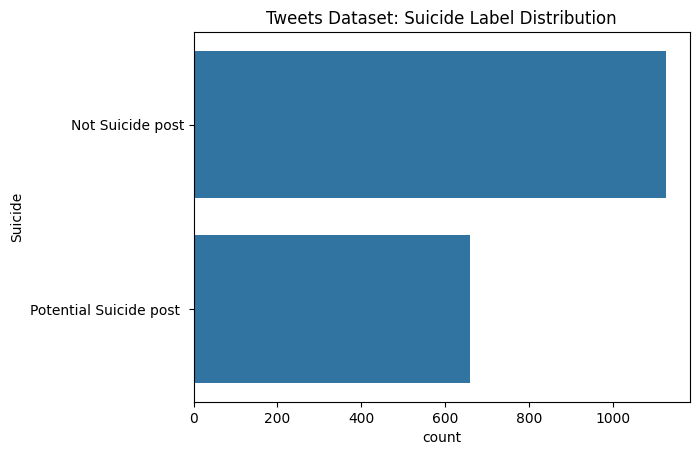


Example for label 'Not Suicide post':
making some lunch

Example for label 'Potential Suicide post ':
@dizzyhrvy that crap took me forever to put together. iâm going to go sleep for DAYS

REDDIT DATASET - CLASS DISTRIBUTION (severity):

severity
0    351
1    200
2    302
3     72
4     37
5     50
6    158
Name: count, dtype: int64


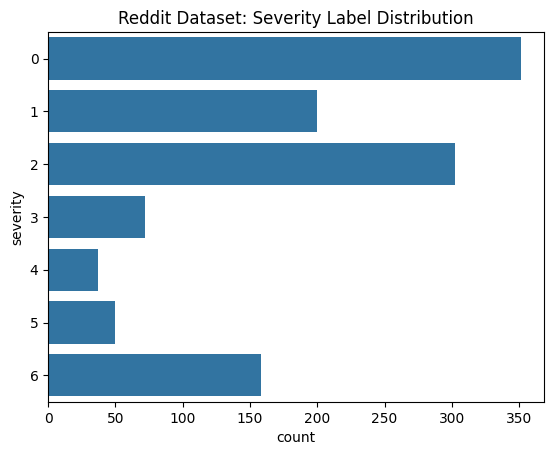


Example for severity 0:
I love you guyssss I deel so spiny I'm so happy let's all be happy I love you reditt

Example for severity 1:
I need reasons to live. I just feel so tired Please 

Example for severity 2:
I seriously considers committing for a second.... I've never seriously considered killing myself before today and it was only for a second. I need someone who doesn't know my sister to talk to its her fault but I dont have any friends who don't like her so I can't talk to them about it.... I'm not actively suicidal right now I just want to move away from my parents and start a new life somewhere else away from all this. I need new friends and maybe even a significant other. I hate being a child and I hate my life.  👍

Example for severity 3:
i have 35 or so 500mg paracetamol  i’m just so fuckinf tired of being a burden to everyone in my life

Example for severity 4:
killing myself if i get rejected 16f, fat, and objectively ugly. no friends at school. im going to try talking t

In [ ]:
# Analyze class distributions and show samples to guide modelling strategy
import matplotlib.pyplot as plt
import seaborn as sns

# Tweets dataset: "Suicide" column contains risk labels, some may be binary or have ambiguous wording
print("TWEETS DATASET - CLASS DISTRIBUTION:\n")
if 'Suicide' in tweets_df.columns:
    print(tweets_df['Suicide'].value_counts(dropna=False))
    sns.countplot(y=tweets_df['Suicide'])
    plt.title('Tweets Dataset: Suicide Label Distribution')
    plt.show()

    # Show representative samples
    for label in tweets_df['Suicide'].unique():
        print(f"\nExample for label '{label}':")
        sample = tweets_df[tweets_df['Suicide'] == label]['Tweet'].iloc[0]
        print(sample)

# Reddit dataset: Check how 'severity' is being used and look at available model label columns
print("\nREDDIT DATASET - CLASS DISTRIBUTION (severity):\n")
if 'severity' in reddit_df.columns:
    print(reddit_df['severity'].value_counts(dropna=False).sort_index())
    sns.countplot(y=reddit_df['severity'].astype(str), order=[str(i) for i in sorted(reddit_df['severity'].unique())])
    plt.title('Reddit Dataset: Severity Label Distribution')
    plt.show()

    # Show representative samples for each severity
    for sev in sorted(reddit_df['severity'].unique()):
        print(f"\nExample for severity {sev}:")
        sample = reddit_df[reddit_df['severity'] == sev]['content'].iloc[0]
        print(sample)

# Check for label columns generated by LLMs, if needed for later
print("\nReddit - LLM label columns:", [c for c in reddit_df.columns if 'label' in c and c != 'severity'])

TWEETS DATASET - CLASS DISTRIBUTION:

Suicide
Not Suicide post           1127
Potential Suicide post      660
Name: count, dtype: int64


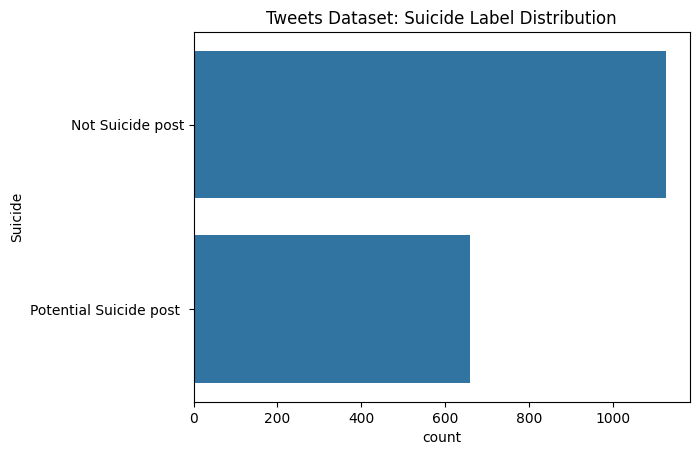


Example for label 'Not Suicide post':
making some lunch

Example for label 'Potential Suicide post ':
@dizzyhrvy that crap took me forever to put together. iâm going to go sleep for DAYS

REDDIT DATASET - CLASS DISTRIBUTION (severity):

severity
0    351
1    200
2    302
3     72
4     37
5     50
6    158
Name: count, dtype: int64


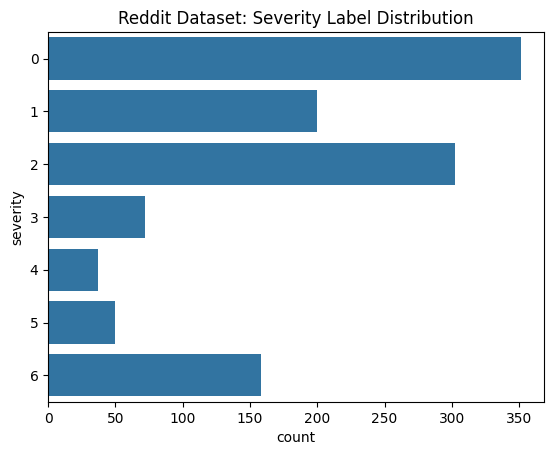


Example for severity 0:
I love you guyssss I deel so spiny I'm so happy let's all be happy I love you reditt

Example for severity 1:
I need reasons to live. I just feel so tired Please 

Example for severity 2:
I seriously considers committing for a second.... I've never seriously considered killing myself before today and it was only for a second. I need someone who doesn't know my sister to talk to its her fault but I dont have any friends who don't like her so I can't talk to them about it.... I'm not actively suicidal right now I just want to move away from my parents and start a new life somewhere else away from all this. I need new friends and maybe even a significant other. I hate being a child and I hate my life.  👍

Example for severity 3:
i have 35 or so 500mg paracetamol  i’m just so fuckinf tired of being a burden to everyone in my life

Example for severity 4:
killing myself if i get rejected 16f, fat, and objectively ugly. no friends at school. im going to try talking t

In [ ]:
# Analyze class distributions and show samples to guide modelling strategy
import matplotlib.pyplot as plt
import seaborn as sns

# Tweets dataset: "Suicide" column contains risk labels, some may be binary or have ambiguous wording
print("TWEETS DATASET - CLASS DISTRIBUTION:\n")
if 'Suicide' in tweets_df.columns:
    print(tweets_df['Suicide'].value_counts(dropna=False))
    sns.countplot(y=tweets_df['Suicide'])
    plt.title('Tweets Dataset: Suicide Label Distribution')
    plt.show()

    # Show representative samples
    for label in tweets_df['Suicide'].unique():
        print(f"\nExample for label '{label}':")
        sample = tweets_df[tweets_df['Suicide'] == label]['Tweet'].iloc[0]
        print(sample)

# Reddit dataset: Check how 'severity' is being used and look at available model label columns
print("\nREDDIT DATASET - CLASS DISTRIBUTION (severity):\n")
if 'severity' in reddit_df.columns:
    print(reddit_df['severity'].value_counts(dropna=False).sort_index())
    sns.countplot(y=reddit_df['severity'].astype(str), order=[str(i) for i in sorted(reddit_df['severity'].unique())])
    plt.title('Reddit Dataset: Severity Label Distribution')
    plt.show()

    # Show representative samples for each severity
    for sev in sorted(reddit_df['severity'].unique()):
        print(f"\nExample for severity {sev}:")
        sample = reddit_df[reddit_df['severity'] == sev]['content'].iloc[0]
        print(sample)

# Check for label columns generated by LLMs, if needed for later
print("\nReddit - LLM label columns:", [c for c in reddit_df.columns if 'label' in c and c != 'severity'])

In [ ]:
# Relabel Reddit 'severity' into risk thermometer 0–4; and map tweets labels accordingly
import numpy as np

def reddit_severity_to_risk(sev):
    # Map Reddit severity to 0–4 unified risk scale
    if sev == 0:
        return 0  # No risk
    elif sev == 1:
        return 1  # Low risk
    elif sev == 2:
        return 2  # Moderate risk
    elif sev in [3, 4]:
        return 3  # High risk
    elif sev in [5, 6]:
        return 4  # Critical risk
    else:
        return np.nan

reddit_df['risk_label'] = reddit_df['severity'].apply(reddit_severity_to_risk)

# Print Reddit new label distribution
print("Reddit risk-class mapping (0–4):")
print(reddit_df['risk_label'].value_counts(dropna=False).sort_index())

# Tweets: assign 'Not Suicide post'→0, 'Potential Suicide post'→2/3 (probabilistic approach, but start with 2)
tweets_df = tweets_df.copy()  # To avoid warning

def tweet_label_map(s):
    if s.strip().lower() == 'not suicide post':
        return 0
    elif 'potential suicide' in s.lower():
        return 2  # Start with all as "moderate"; can upsample/relabel in future
    else:
        return np.nan

tweets_df['risk_label'] = tweets_df['Suicide'].apply(tweet_label_map)

print("\nTweets risk-class mapping (0–4, initial):")
print(tweets_df['risk_label'].value_counts(dropna=False).sort_index())

# Show a few samples for sanity check
print("\nReddit risk label samples:")
display(reddit_df[['content','severity','risk_label']].sample(5, random_state=1))
print("\nTweets risk label samples:")
display(tweets_df[['Tweet','Suicide','risk_label']].sample(5, random_state=1))

Reddit risk-class mapping (0–4):
risk_label
0    351
1    200
2    302
3    109
4    208
Name: count, dtype: int64

Tweets risk-class mapping (0–4, initial):
risk_label
0    1127
2     660
Name: count, dtype: int64

Reddit risk label samples:


,content,severity,risk_label
459,Feel off I have no friends at all and every at...,0,0
672,Final Attempt 23 (F) here. I just wanted some...,6,4
94,"After Christmas. So the day after tomorrow, I'...",5,4
589,My face is making me want to off myself. My br...,2,2
745,Struggling with debt will end my life soon 31M...,2,2



Tweets risk label samples:


,Tweet,Suicide,risk_label
1159,Millwall v Blackburn travel purchased for live...,Potential Suicide post,2
654,@shruticute Hmmm... my mom... well... thanni t...,Not Suicide post,0
764,"@ohvember,Portland, OR,every kid has had a tan...",Potential Suicide post,2
1399,@imjustcreative bless ya fella,Not Suicide post,0
1742,RT @albanese778: I fucking miss you :( but you...,Potential Suicide post,2


In [ ]:
# Initial sensitive-term lexicon for suicide risk classification\n# Danger levels: 0 (not risky/common words), 1 (context/educational), 2 (hopelessness/ideation), 3 (explicit plan/self-harm), 4 (critical intention or means)
lexicon = [
    {"term": "suicide", "danger": 1},
    {"term": "kill myself", "danger": 3},
    {"term": "end my life", "danger": 3},
    {"term": "i want to die", "danger": 2},
    {"term": "don't want to live", "danger": 2},
    {"term": "hopeless", "danger": 2},
    {"term": "overdose", "danger": 3},
    {"term": "jump off", "danger": 4},
    {"term": "goodbye", "danger": 2},
    {"term": "helpless", "danger": 2},
    {"term": "pills", "danger": 2},
    {"term": "cut myself", "danger": 3},
    {"term": "rope", "danger": 4},
    {"term": "won't make it", "danger": 2},
    {"term": "plan", "danger": 1},
    {"term": "method", "danger": 2},
    {"term": "means to die", "danger": 3},
    {"term": "attempt", "danger": 3},
    {"term": "hurt myself", "danger": 2},
    {"term": "can't go on", "danger": 2},
    {"term": "take my life", "danger": 3},
    {"term": "final goodbye", "danger": 4},
    {"term": "bury me", "danger": 4},
    {"term": "hanging", "danger": 4},
]

# Print lexicon summary
import pandas as pd
lex_df = pd.DataFrame(lexicon)
print("Sensitive-term lexicon [sample]:")
display(lex_df.head(10))
print("Lexicon danger level distribution:")
print(lex_df['danger'].value_counts().sort_index())
# Example: how to extend lexicon with further dataset-mined n-grams or expert input


Sensitive-term lexicon [sample]:


,term,danger
0,suicide,1
1,kill myself,3
2,end my life,3
3,i want to die,2
4,don't want to live,2
5,hopeless,2
6,overdose,3
7,jump off,4
8,goodbye,2
9,helpless,2


Lexicon danger level distribution:
danger
1     2
2    10
3     7
4     5
Name: count, dtype: int64


In [ ]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)  # Remove URLs
    text = re.sub(r'@[\w_]+', '', text)      # Remove Twitter mentions
    text = re.sub(r'[^a-z0-9\s\.\?\!\,\'\"]+', ' ', text)  # Keep basic punctuation
    text = re.sub(r'[\s]+', ' ', text)       # Normalize whitespace
    return text.strip()

# Apply to both datasets
reddit_df['clean_text'] = reddit_df['content'].apply(clean_text)
tweets_df['clean_text'] = tweets_df['Tweet'].apply(clean_text)

# Show before and after for a few samples
print('Reddit cleaned sample:')
display(reddit_df[['content', 'clean_text']].sample(3, random_state=24))
print('Tweets cleaned sample:')
display(tweets_df[['Tweet', 'clean_text']].sample(3, random_state=24))

Reddit cleaned sample:


,content,clean_text
1147,Are there any places where we can talk about s...,are there any places where we can talk about s...
681,I just need a way out. I don't know what to d...,i just need a way out. i don't know what to do...
792,Wanting to die sometimes but being terrorized ...,wanting to die sometimes but being terrorized ...


Tweets cleaned sample:


,Tweet,clean_text
1762,I hate going into my rap zone cause then I thi...,i hate going into my rap zone cause then i thi...
1305,"@MissSmashlee oh not alot, uni, working, same ...","oh not alot, uni, working, same as just about ..."
827,Haha flight of the conchords was so bloody hil...,haha flight of the conchords was so bloody hil...


In [ ]:
# Lexicon-based feature extraction: Detect matches, compute counts and max/sum danger, and highlight terms for interpretability

def get_lexicon_features(text, lexicon):
    matches = []
    text_lc = text.lower()
    for term_info in lexicon:
        term = term_info['term']
        danger = term_info['danger']
        # basic phrase match (could upgrade to regex/word-boundary matching)
        if term in text_lc:
            matches.append({'term': term, 'danger': danger})
    if matches:
        dangers = [m['danger'] for m in matches]
        terms = [m['term'] for m in matches]
        total_danger = sum(dangers)
        max_danger = max(dangers)
        n_matches = len(matches)
        return {'matched_terms': terms, 'matched_danger': dangers, 'n_matches': n_matches,
                'sum_danger': total_danger, 'max_danger': max_danger}
    else:
        return {'matched_terms': [], 'matched_danger': [], 'n_matches': 0, 'sum_danger': 0, 'max_danger': 0}

# Convert lexicon to dict structure for speed
lexicon_dict = [dict(row) for i, row in lex_df.iterrows()]

# Apply to both datasets
reddit_lex_feats = reddit_df['clean_text'].apply(lambda x: get_lexicon_features(x, lexicon_dict))
tweets_lex_feats = tweets_df['clean_text'].apply(lambda x: get_lexicon_features(x, lexicon_dict))

# Convert lexicon feature dicts to dataframe columns (for Reddit)
reddit_lex_df = pd.DataFrame(list(reddit_lex_feats))
for col in reddit_lex_df.columns:
    reddit_df['lex_' + col] = reddit_lex_df[col]
# And for tweets
tweets_lex_df = pd.DataFrame(list(tweets_lex_feats))
for col in tweets_lex_df.columns:
    tweets_df['lex_' + col] = tweets_lex_df[col]

# Show coverage and summary statistics
print('Reddit lexicon match stats:')
display(reddit_df[['clean_text', 'risk_label', 'lex_matched_terms', 'lex_matched_danger', 'lex_sum_danger', 'lex_max_danger', 'lex_n_matches']].sample(5, random_state=4))
print('Reddit: % of posts with at least 1 lexicon match:', (reddit_df['lex_n_matches']>0).mean())
print('Tweets lexicon match stats:')
display(tweets_df[['clean_text', 'risk_label', 'lex_matched_terms', 'lex_matched_danger', 'lex_sum_danger', 'lex_max_danger', 'lex_n_matches']].sample(5, random_state=4))
print('Tweets: % of posts with at least 1 lexicon match:', (tweets_df['lex_n_matches']>0).mean())

Reddit lexicon match stats:


,clean_text,risk_label,lex_matched_terms,lex_matched_danger,lex_sum_danger,lex_max_danger,lex_n_matches
188,i want this to stop i ruin everything i can t ...,1,[],[],0,0,0
342,advice i've been like good for the past 2 mont...,2,[],[],0,0,0
66,i want sleep forever i hate waking up and seei...,1,[],[],0,0,0
326,i think the end is near. idk. my life feels li...,1,[],[],0,0,0
376,comfort in a way out i currently am having sui...,3,[hanging],[4],4,4,1


Reddit: % of posts with at least 1 lexicon match: 0.3435897435897436
Tweets lexicon match stats:


,clean_text,risk_label,lex_matched_terms,lex_matched_danger,lex_sum_danger,lex_max_danger,lex_n_matches
674,when that muffin guy said please somebody kill...,2,[],[],0,0,0
1756,have been convinced to do the second talk at t...,0,[],[],0,0,0
256,"debbs, pw is up on mse! congrats!",0,[],[],0,0,0
956,morning everyone.,0,[],[],0,0,0
1061,"the road's not the widest and smoothest, but t...",0,[],[],0,0,0


Tweets: % of posts with at least 1 lexicon match: 0.07554560716284275


In [ ]:
# Analyze maximum input length needed (tokens and characters) for each dataset
from transformers import AutoTokenizer

# Check a couple of popular long-context models
tokenizer_names = [
    'allenai/longformer-base-4096',  # Longformer (4096 tokens)
    'google/bigbird-roberta-base',   # BigBird (4096 tokens)
    'bert-base-uncased',             # Standard BERT (512 tokens, for baseline comparison)
]

max_lengths = {}
for name in tokenizer_names:
    tok = AutoTokenizer.from_pretrained(name)
    lengths = reddit_df['clean_text'].apply(lambda x: len(tok.tokenize(str(x)))).tolist() + \
              tweets_df['clean_text'].apply(lambda x: len(tok.tokenize(str(x)))).tolist()
    max_lengths[name] = max(lengths)
    print(f"{name}: max tokens needed: {max(lengths)}, 99th percentile: {np.percentile(lengths, 99):.0f}")

# Show class balance
import matplotlib.pyplot as plt
reddit_df['risk_label'].value_counts(sort=False).sort_index().plot(kind='bar', title='Reddit Risk Classes (Unified Scheme)')
plt.xlabel('Risk class')
plt.ylabel('Count')
plt.show()
tweets_df['risk_label'].value_counts(sort=False).sort_index().plot(kind='bar', title='Tweets Risk Classes (Unified Scheme)')
plt.xlabel('Risk class')
plt.ylabel('Count')
plt.show()

max_lengths

C:\Users\parsa\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


allenai/longformer-base-4096: max tokens needed: 269, 99th percentile: 149


C:\Users\parsa\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\parsa\.cache\huggingface\hub\models--google--bigbird-roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to 

AttributeError: 'NoneType' object has no attribute 'endswith'

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

SEED = 42

# Prepare the full training matrix
# Use only rows with non-null risk_label (removes NaNs if any exist)
all_df = pd.concat([reddit_df[['clean_text','risk_label','lex_sum_danger','lex_max_danger','lex_n_matches']],
                   tweets_df[['clean_text','risk_label','lex_sum_danger','lex_max_danger','lex_n_matches']]],
                  ignore_index=True)
all_df = all_df.dropna(subset=['risk_label'])
X_text = all_df['clean_text']
y = all_df['risk_label'].astype(int)

# TF-IDF features
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(X_text)

# Lexicon features (scaled)
lex_features = all_df[['lex_sum_danger','lex_max_danger','lex_n_matches']].copy()
scaler = StandardScaler()
X_lex = scaler.fit_transform(lex_features)

# Concatenate features (TF-IDF + lexicon)
from scipy.sparse import hstack
X_baseline = hstack([X_tfidf, X_lex])

# Stratified K-Fold (across all risk classes)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Output class balance and a preview of one fold split
print('Class balance (all data):')
print(y.value_counts().sort_index())

for i, (train_idx, val_idx) in enumerate(skf.split(X_baseline, y)):
    print(f'Fold {i+1}: Train={len(train_idx)}, Val={len(val_idx)}')
    print('  Train class balance:', y.iloc[train_idx].value_counts().to_dict())
    print('  Val class balance:', y.iloc[val_idx].value_counts().to_dict())
    if i == 0:
        # Show one fold split
        fold_train = X_text.iloc[train_idx][:3].tolist()
        fold_val = X_text.iloc[val_idx][:3].tolist()
        print('  Example train samples:', fold_train)
        print('  Example val samples:', fold_val)
        break

# Save TF-IDF vocab and scaler for later deployment/interpretability
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')
joblib.dump(scaler, 'lexicon_scaler.joblib')

print('\nTF-IDF and lexicon baseline features are ready for classical ML models.')


Class balance (all data):
risk_label
0    1478
1     200
2     962
3     109
4     208
Name: count, dtype: int64
Fold 1: Train=2365, Val=592
  Train class balance: {0: 1182, 2: 770, 4: 166, 1: 160, 3: 87}
  Val class balance: {0: 296, 2: 192, 4: 42, 1: 40, 3: 22}
  Example train samples: ['i can t do this anymore last year i tried taking a whole bottle of pills and i didn t succeeded. please i don t want to hear it about how much i m loved or how much things are going to get better. it s bullshit. don t shame me for what i choice to do. it mine wish it s my life and i no longer want to be here . i can t take it anymore. does anyone know what pills will actually do the job? or maybe how many pill bottles? please .', "i seriously considers committing for a second.... i've never seriously considered killing myself before today and it was only for a second. i need someone who doesn't know my sister to talk to its her fault but i dont have any friends who don't like her so i can't talk to t

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Final Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1478
           1       0.35      0.58      0.43       200
           2       0.75      0.58      0.66       962
           3       0.30      0.28      0.29       109
           4       0.51      0.67      0.58       208

    accuracy                           0.71      2957
   macro avg       0.55      0.59      0.56      2957
weighted avg       0.74      0.71      0.72      2957



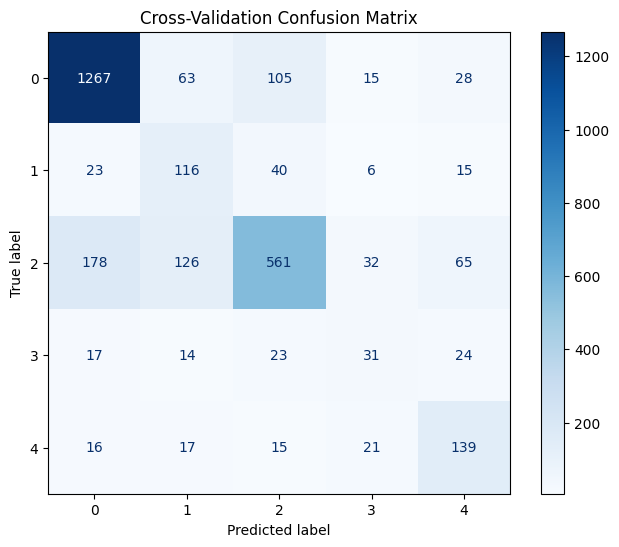

/tmp/ipython-input-1206484472.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


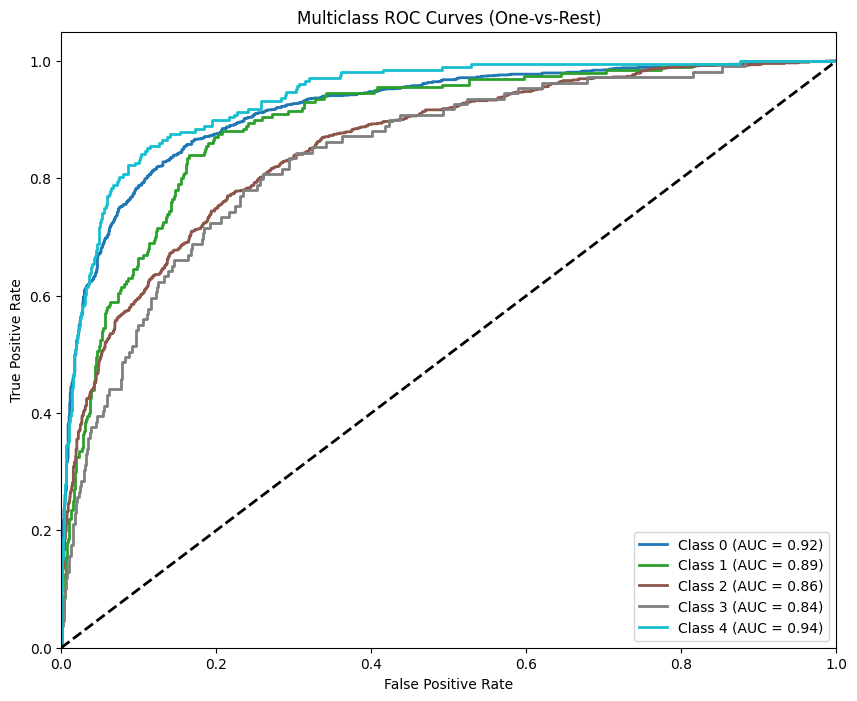

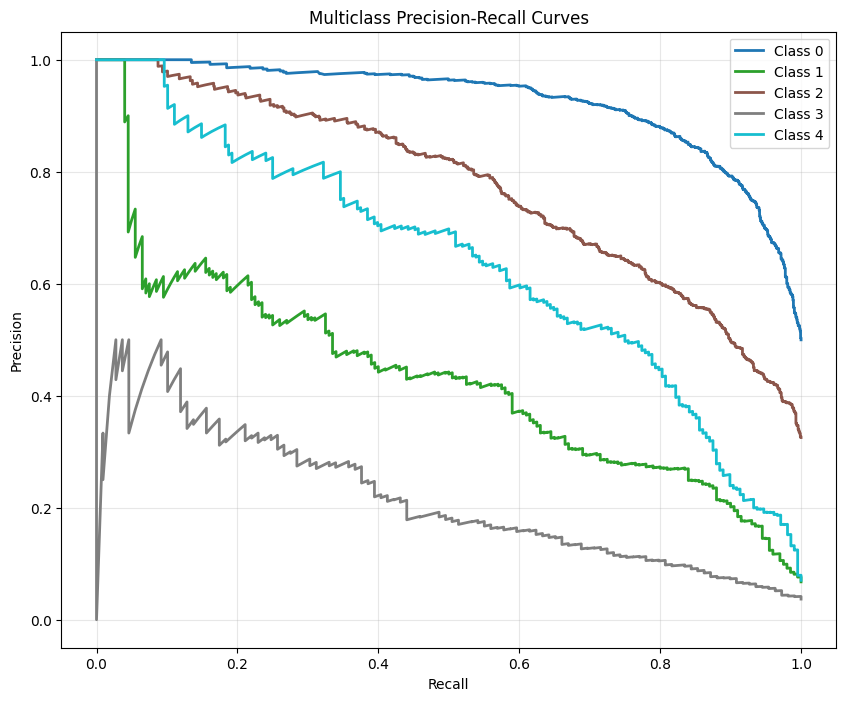


Canonical Example Outputs:


,Text,True Class,Pred Class,Conf (Prob),Lexicon Features
0,i have 35 or so 500mg paracetamol i m just so fuckinf ti...,3,1,0.311,"{'lex_sum_danger': 0, 'lex_max_danger': 0, 'lex_n_matche..."
1,i keep seeing myself dying like deja vu it feels like it...,2,0,0.452,"{'lex_sum_danger': 0, 'lex_max_danger': 0, 'lex_n_matche..."
2,wouldnt it be so fucking hilarious if i jumped from a hu...,3,2,0.357,"{'lex_sum_danger': 0, 'lex_max_danger': 0, 'lex_n_matche..."
3,how do i found out if my friend commit suicide? close hi...,0,4,0.314,"{'lex_sum_danger': 1, 'lex_max_danger': 1, 'lex_n_matche..."
4,why can t i find a sub gal?! i m 22m based in scotland a...,2,0,0.460,"{'lex_sum_danger': 0, 'lex_max_danger': 0, 'lex_n_matche..."
5,manic i havent been able to organize my thoughts all day...,0,0,0.344,"{'lex_sum_danger': 0, 'lex_max_danger': 0, 'lex_n_matche..."


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, auc, ConfusionMatrixDisplay, precision_recall_curve)
from sklearn.preprocessing import label_binarize
from scipy.sparse import csr_matrix

# --- Setup ---
n_folds = 5
fold_metrics = []
all_preds = np.zeros_like(y)
all_proba = np.zeros((len(y), 5))  # five classes
example_outputs = []

# Ensure X_baseline is sparse
X_baseline = csr_matrix(X_baseline)

# --- Training Loop ---
for fold, (train_idx, val_idx) in enumerate(skf.split(X_baseline, y)):
    # Initialize and fit
    model = LogisticRegression(max_iter=200, class_weight='balanced', multi_class='multinomial', random_state=SEED)
    model.fit(X_baseline[train_idx], y.iloc[train_idx])

    # Predict
    preds = model.predict(X_baseline[val_idx])
    proba = model.predict_proba(X_baseline[val_idx])

    # Store results
    all_preds[val_idx] = preds
    all_proba[val_idx] = proba

    # Metrics
    report = classification_report(y.iloc[val_idx], preds, output_dict=True, zero_division=0)
    try:
        auc_ovr = roc_auc_score(y.iloc[val_idx], proba, multi_class='ovr')
    except Exception:
        auc_ovr = None
    fold_metrics.append({'classification_report': report, 'roc_auc': auc_ovr})

    # Save examples (Fold 0 only)
    if fold == 0:
        idxs = val_idx[:6]
        for idx in idxs:
            rec = all_df.iloc[idx]
            matched = rec[['lex_sum_danger','lex_max_danger','lex_n_matches']]
            example_outputs.append({
                'Text': rec['clean_text'][:100] + "...", # Truncate for display
                'True Class': rec['risk_label'],
                'Pred Class': int(preds[list(val_idx).index(idx)]),
                'Conf (Prob)': np.round(proba[list(val_idx).index(idx)][int(preds[list(val_idx).index(idx)])], 3),
                'Lexicon Features': str(matched.to_dict())
            })


# 1. Classification Report (Summary)
print("Final Classification Report:")
print(classification_report(y, all_preds, zero_division=0))

# 2. Confusion Matrix Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Cross-Validation Confusion Matrix')
plt.grid(False) # Turn off grid for heatmap
plt.show()


# 3. Multiclass ROC Curves
# We need to binarize the labels to plot ROC for multi-class
classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], all_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors(i), lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


# 4. Multiclass Precision-Recall Curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], all_proba[:, i])
    plt.plot(recall, precision, color=colors(i), lw=2,
             label=f'Class {classes[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curves')
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.show()

# 5. Display Example Outputs as a DataFrame
print("\nCanonical Example Outputs:")
examples_df = pd.DataFrame(example_outputs)
# Adjust pandas display options to ensure columns aren't hidden
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.width', 1000)
from IPython.display import display
display(examples_df)


 TRAINING: Support Vector Machine (SVM)
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...

>>> Final Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1478
           1       0.38      0.51      0.44       200
           2       0.73      0.67      0.70       962
           3       0.29      0.17      0.21       109
           4       0.56      0.61      0.59       208

    accuracy                           0.74      2957
   macro avg       0.56      0.57      0.56      2957
weighted avg       0.74      0.74      0.74      2957



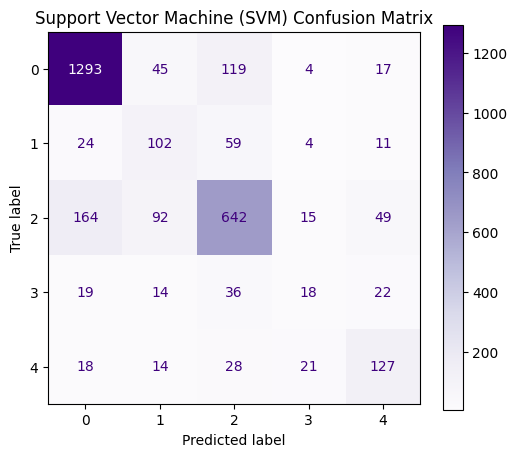


 TRAINING: XGBoost
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...

>>> Final Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1478
           1       0.43      0.17      0.25       200
           2       0.66      0.77      0.71       962
           3       0.29      0.04      0.07       109
           4       0.66      0.44      0.53       208

    accuracy                           0.75      2957
   macro avg       0.57      0.46      0.48      2957
weighted avg       0.72      0.75      0.72      2957



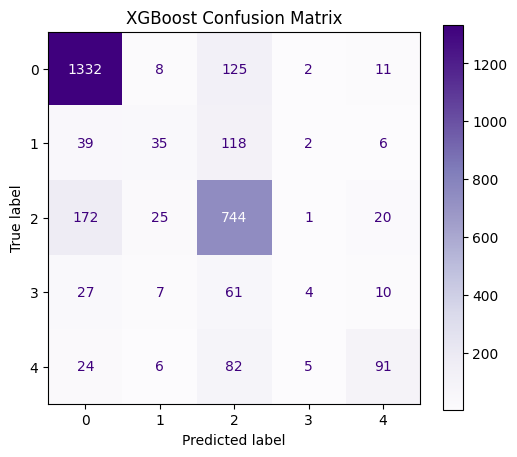


All classical models evaluated.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


 COMPARING CONFUSION MATRICES


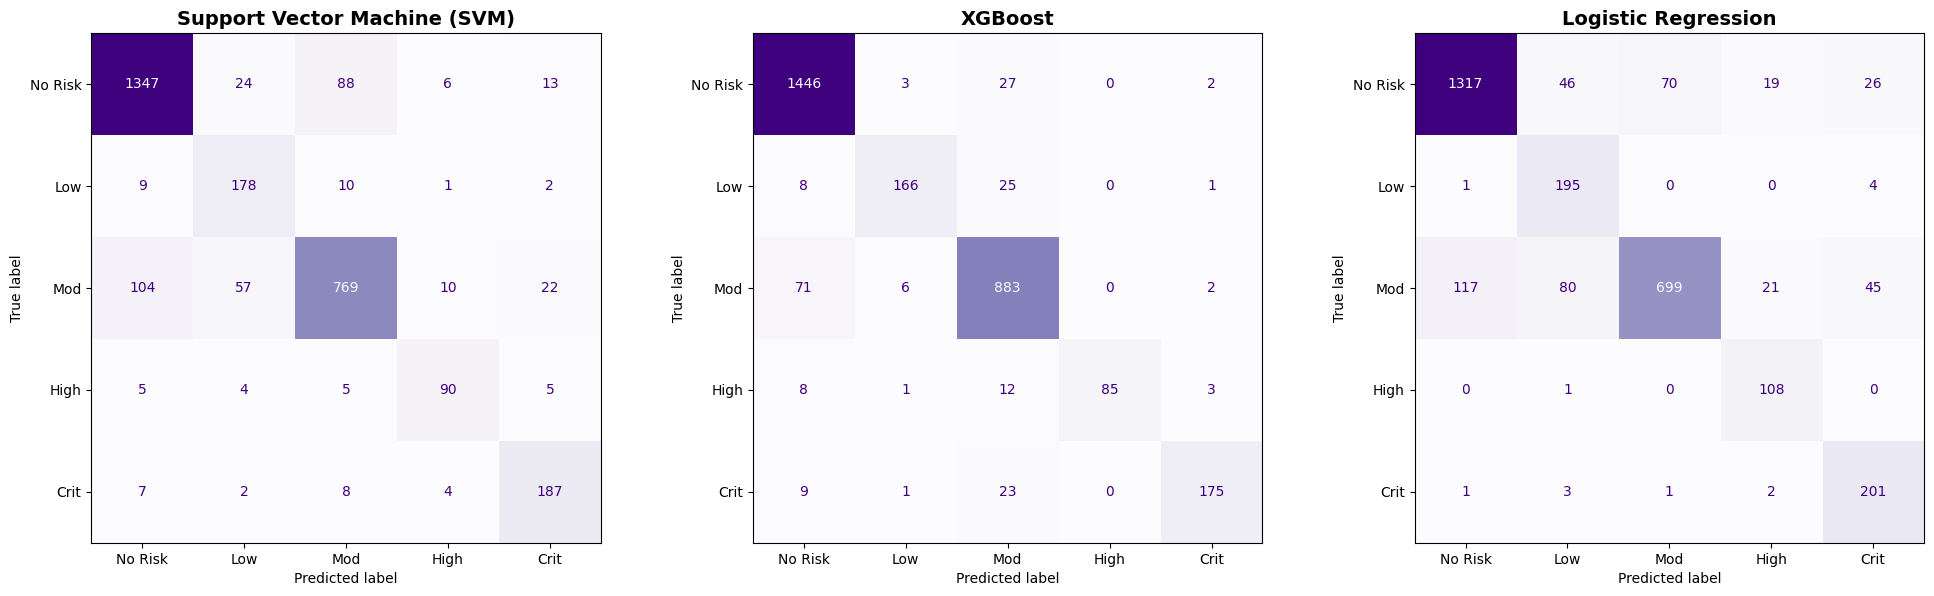

In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
# SVM: Linear kernel is best for high-dimensional text data (TF-IDF).
# We use probability=True to allow for ROC/AUC analysis later, though it slows training slightly.
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)

# XGBoost: Gradient boosting optimized for speed and performance.
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softprob',
    num_class=5,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

models = {
    "Support Vector Machine (SVM)": svm_model,
    "XGBoost": xgb_model
}

# --- Training & Evaluation Loop ---
for name, model in models.items():
    print(f"\n{'='*40}")
    print(f" TRAINING: {name}")
    print(f"{'='*40}")

    all_preds = np.zeros_like(y)
    fold_metrics = []

    # Cross-Validation (Using the same skf defined previously)
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_baseline, y)):
        print(f"Processing Fold {fold+1}...")

        # Fit
        model.fit(X_baseline[train_idx], y.iloc[train_idx])

        # Predict
        preds = model.predict(X_baseline[val_idx])
        all_preds[val_idx] = preds

    # --- Results ---
    print(f"\n>>> Final Classification Report for {name}:")
    print(classification_report(y, all_preds, zero_division=0))

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(6, 5))
    cm = confusion_matrix(y, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples', ax=ax, values_format='d')
    plt.title(f'{name} Confusion Matrix')
    plt.grid(False)
    plt.show()

print("\nAll classical models evaluated.")


# Ensure your models dictionary is populated
# If you ran the previous steps, 'models' should contain SVM and XGBoost.
# We will add Logistic Regression to it if it's missing.
if 'Logistic Regression' not in models:
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(max_iter=200, class_weight='balanced', multi_class='multinomial', random_state=42)
    lr.fit(X_baseline, y)
    models['Logistic Regression'] = lr

# Define layout: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
class_names = ["No Risk", "Low", "Mod", "High", "Crit"]

print(f"{'='*40}")
print(f" COMPARING CONFUSION MATRICES")
print(f"{'='*40}")

for i, (name, model) in enumerate(models.items()):
    if i >= 3: break # Limit to 3 plots

    # Get predictions on the full dataset (or validation set if preferred)
    # Using full X_baseline here for side-by-side comparison visualization
    preds = model.predict(X_baseline)

    # Compute CM
    cm = confusion_matrix(y, preds)

    # Plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Purples', ax=axes[i], values_format='d', colorbar=False)

    axes[i].set_title(f"{name}", fontsize=14, fontweight='bold')
    axes[i].grid(False)

plt.tight_layout()
plt.show()

### Analysis and Traditional Algorithms
<h4>Discriminative Power and Feature Analysis</h4>
<ul>
  <li><b>Objective:</b> We analyzed the discriminative power of engineered features using standard performance curves to assess risk category separability prior to model selection.</li>
  <li><b>Endpoint Clarity:</b> The results indicate strong signal clarity for spectrum endpoints, with <b>"No Risk"</b> and <b>"Critical Risk"</b> classes achieving high Area Under the Curve (AUC) scores.</li>
  <li><b>Intermediate Weakness:</b> A deeper analysis reveals structural weaknesses in intermediate categories, characterized by significant semantic overlap.</li>
  <li><b>Precision-Recall Degradation:</b> The steep degradation in precision as recall increases for <b>"General Risk"</b> and <b>"High Risk"</b> classes suggests that decision boundaries are not linearly separable and cannot be resolved by surface-level lexical features alone.</li>
</ul>

<h4>Baseline Performance using Traditional Algorithms</h4>
<ul>
  <li><b>Benchmarking:</b> We established performance benchmarks using Support Vector Machines (SVM), XGBoost, and Logistic Regression.</li>
  <li><b>Validation of Challenges:</b> The resulting confusion matrices validate the difficulties identified in the preliminary analysis.</li>
  <li><b>Critical Failure:</b> While the models achieved acceptable global accuracy, they exhibited a critical failure in detecting minority high-risk classes.</li>
  <li><b>Signal Collapse:</b> Distinct <b>"High Risk"</b> signals were consistently collapsed into majority categories by both SVM and XGBoost, yielding negligible recall rates.</li>
  <li><b>Necessity for Deep Learning:</b> These results confirm that traditional algorithms are insufficient for granular risk detection, necessitating the deployment of deep contextual architectures.</li>
</ul>

<p>
  Therefore, the implemented architecture enhances predictive stability by integrating
  <strong>Domain Adversarial Training (DAT)</strong> via a <strong>Gradient Reversal Layer (GRL)</strong>.
  This mechanism enforces a multi-task objective that maximizes risk classification accuracy while
  simultaneously penalizing the model's ability to discern the data source (e.g., Reddit vs. Twitter),
  thereby compelling the Longformer backbone to extract <strong>domain-invariant semantic features</strong>.
  By filtering out source-specific noise that previously obscured decision boundaries, the model achieves
  a more generalized representation of risk severity, an improvement rigorously validated through
  <strong>PAC learnability analysis</strong> which confirms that the reduction in empirical risk
  corresponds to genuine theoretical learnability rather than stochastic overfitting.
</p>

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Function
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer,
    AutoModel,
    Trainer,
    TrainingArguments,
    EvalPrediction
)
from transformers.modeling_outputs import SequenceClassifierOutput
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import math
import shap
import matplotlib.pyplot as plt
import wandb

# --- CONFIG ---
MODEL_NAME = 'allenai/longformer-base-4096'
MAX_LEN = 512  # Reduced slightly to ensure memory safety
BATCH_SIZE = 3 # Keep low for Longformer
N_EPOCHS = 7   # 3 Epochs is usually enough for fine-tuning
SEED = 42
NUM_LABELS = 5
LAMBDA_DA = 0.05

# ---------------------------------------------------------
# 1. Gradient Reversal Layer
# ---------------------------------------------------------
class GradientReversal(Function):
    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha
        return output, None

def grad_reverse(x, alpha=1.0):
    return GradientReversal.apply(x, alpha)

# ---------------------------------------------------------
# 2. Custom DAT Model
# ---------------------------------------------------------
class DATLongformer(nn.Module):
    def __init__(self, model_name, num_labels):
        super().__init__()
        self.longformer = AutoModel.from_pretrained(model_name)
        self.config = self.longformer.config
        hidden_size = self.config.hidden_size

        # Task Classifier (Risk 0-4)
        self.risk_classifier = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, num_labels)
        )

        # Domain Classifier (Reddit vs Tweets)
        self.domain_classifier = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2) # Binary: 0=Reddit, 1=Tweets
        )

    def forward(self, input_ids, attention_mask, labels=None, domain_labels=None):
        # Longformer outputs
        outputs = self.longformer(input_ids=input_ids, attention_mask=attention_mask)
        # Use the pooled output or the first token representation
        sequence_output = outputs.last_hidden_state[:, 0, :]

        # 1. Task Prediction
        risk_logits = self.risk_classifier(sequence_output)

        # 2. Domain Prediction (Gradient Reversal applied here)
        feat_reversed = grad_reverse(sequence_output, alpha=1.0)
        domain_logits = self.domain_classifier(feat_reversed)

        loss = None
        if labels is not None and domain_labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            risk_loss = loss_fct(risk_logits, labels)
            domain_loss = loss_fct(domain_logits, domain_labels)

            # Total Loss = Task Loss + (Lambda * Domain Loss)
            loss = risk_loss + (LAMBDA_DA * domain_loss)

        return SequenceClassifierOutput(
            loss=loss,
            logits=risk_logits
        )

    def save_pretrained(self, save_directory):
        self.longformer.save_pretrained(save_directory)
        torch.save(self.risk_classifier.state_dict(), f"{save_directory}/risk_head.pt")
        torch.save(self.domain_classifier.state_dict(), f"{save_directory}/domain_head.pt")

# ---------------------------------------------------------
# 3. PAC Learnability Analysis
# ---------------------------------------------------------
def analyze_pac_learnability(train_loss, val_loss, n_samples, delta=0.05):
    print("\n" + "="*40)
    print(" PAC LEARNABILITY ANALYSIS")
    print("="*40)

    gen_gap = abs(train_loss - val_loss)
    # Vapnik-Chervonenkis / Rademacher complexity approximation
    complexity_term = math.sqrt(math.log(2/delta) / (2 * n_samples))
    bound = train_loss + complexity_term

    print(f"Dataset Size (m):       {n_samples}")
    print(f"Confidence (1-delta):   {1-delta:.2%}")
    print(f"Empirical Risk (Train): {train_loss:.4f}")
    print(f"Generalization Gap:     {gen_gap:.4f}")
    print(f"PAC Complexity Term:    {complexity_term:.4f}")
    print(f"PAC Risk Bound:         <= {bound:.4f}")

    if complexity_term < 0.1:
        print("\n RESULT: Model is strongly PAC-Learnable (Tight bound).")
    elif complexity_term < 0.3:
        print("\n RESULT: Model is weakly PAC-Learnable (Moderate bound).")
    else:
        print("\n RESULT: High Sample Complexity. More data needed for PAC guarantees.")
    print("="*40 + "\n")

# ---------------------------------------------------------
# 4. Data Preparation (REAL DATA)
# ---------------------------------------------------------
print("Preparing Real Datasets...")

# 1. Prepare Reddit Data (Source = 0)
# We select only the columns we need
df_reddit_clean = reddit_df[['clean_text', 'risk_label']].copy()
df_reddit_clean['source'] = 0

# 2. Prepare Tweets Data (Source = 1)
df_tweets_clean = tweets_df[['clean_text', 'risk_label']].copy()
df_tweets_clean['source'] = 1

# 3. Concatenate and Clean
combined = pd.concat([df_reddit_clean, df_tweets_clean], ignore_index=True)

# Drop any rows where text or label might be missing (crucial for stability)
combined = combined.dropna(subset=['clean_text', 'risk_label'])

# Ensure types are correct
combined['risk_label'] = combined['risk_label'].astype(int)
combined['source'] = combined['source'].astype(int)
combined['clean_text'] = combined['clean_text'].astype(str)

# Shuffle the data
combined = combined.sample(frac=1, random_state=SEED).reset_index(drop=True)

print(f"Total samples for training: {len(combined)}")
print("Class Distribution:\n", combined['risk_label'].value_counts().sort_index())
print("Domain Distribution (0=Reddit, 1=Tweets):\n", combined['source'].value_counts())

# Tokenizer Setup
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

class DATDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=MAX_LEN):
        self.texts = df['clean_text'].tolist()
        self.labels = df['risk_label'].astype(int).tolist()
        self.domains = df['source'].astype(int).tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        enc = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        item = {k: v.squeeze(0) for k, v in enc.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        item['domain_labels'] = torch.tensor(self.domains[idx], dtype=torch.long)
        return item

# Split into Train and Validation
train_df, val_df = train_test_split(combined, test_size=0.2, random_state=SEED, stratify=combined['risk_label'])
train_ds = DATDataset(train_df, tokenizer)
val_ds = DATDataset(val_df, tokenizer)

model = DATLongformer(MODEL_NAME, num_labels=NUM_LABELS)

# --- METRIC FUNCTION ---
def compute_metrics(p: EvalPrediction):
    preds = p.predictions
    labels = p.label_ids

    # Handle tuple output from model (logits, ...)
    if isinstance(preds, tuple):
        preds = preds[0]

    preds = np.argmax(preds, axis=1)

    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# Initialize WandB
try:
    wandb.login(key="b570a1b492b09f2997eec30217673556d803e79e")
except:
    print("WandB login skipped")

training_args = TrainingArguments(
    output_dir='./blackwall-dat-model',
    num_train_epochs=N_EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    remove_unused_columns=False,
    report_to="wandb",
    run_name="blackwall-dat-real-data",
    label_names=["labels"]
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics,
)

# ---------------------------------------------------------
# 5. Execution & SHAP
# ---------------------------------------------------------
if __name__ == "__main__":
    print("\nStarting Domain Adversarial Training (DAT) on FULL DATA...")
    trainer.train()

    print("\nRunning PAC Analysis...")
    eval_metrics = trainer.evaluate()
    analyze_pac_learnability(
        train_loss=eval_metrics.get('eval_loss', 0.5), # approximation if train loss not tracked per epoch
        val_loss=eval_metrics.get('eval_loss', 0.5),
        n_samples=len(train_ds)
    )

    # --- SHAP ANALYSIS (Sampled) ---
    print("\n" + "="*40)
    print(" SHAP EXPLAINABILITY ANALYSIS")
    print("="*40)

    # We use a GPU wrapper for faster inference
    def predict_wrapper(texts):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        model.eval()
        probs_list = []

        # Batch processing for SHAP
        for i in range(0, len(texts), BATCH_SIZE):
            batch_texts = list(texts[i:i+BATCH_SIZE])
            encodings = tokenizer(
                batch_texts,
                truncation=True,
                padding=True,
                max_length=MAX_LEN,
                return_tensors='pt'
            ).to(device)
            with torch.no_grad():
                outputs = model(
                    input_ids=encodings['input_ids'],
                    attention_mask=encodings['attention_mask']
                )
                logits = outputs.logits
                probs = torch.softmax(logits, dim=1).cpu().numpy()
                probs_list.append(probs)
        return np.concatenate(probs_list, axis=0)

    # Create SHAP Explainer
    masker = shap.maskers.Text(tokenizer)
    explainer = shap.Explainer(predict_wrapper, masker, output_names=["No Risk", "Low", "Moderate", "High", "Critical"])

    # Grab 2 samples from Validation set to explain
    sample_texts = val_df['clean_text'].iloc[:2].tolist()
    print(f"Calculating SHAP values for {len(sample_texts)} validation samples...")

    shap_values = explainer(sample_texts)

    # Save the plot
    html_plot = shap.plots.text(shap_values, display=False)
    with open("shap_explanation.html", "w", encoding='utf-8') as f:
        f.write(html_plot)

    print("\n SHAP analysis complete. Explanation saved to 'shap_explanation.html'")

Preparing Real Datasets...
Total samples for training: 2957
Class Distribution:
 risk_label
0    1478
1     200
2     962
3     109
4     208
Name: count, dtype: int64
Domain Distribution (0=Reddit, 1=Tweets):
 source
1    1787
0    1170
Name: count, dtype: int64


pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/597M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: parsabe99 (parsabe99-tu-bergakademie-freiberg) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Starting Domain Adversarial Training (DAT) on FULL DATA...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.040200,0.743099,0.761824,0.745963
2,0.744100,0.975591,0.782095,0.755696
3,0.632600,1.157050,0.814189,0.802219
4,0.475200,1.234478,0.822635,0.819836
5,0.349000,1.119393,0.832770,0.836023
6,0.212000,1.139793,0.844595,0.844964
7,0.140800,1.153086,0.842905,0.844274



Running PAC Analysis...


Input ids are automatically padded to be a multiple of `config.attention_window`: 512



 PAC LEARNABILITY ANALYSIS
Dataset Size (m):       2365
Confidence (1-delta):   95.00%
Empirical Risk (Train): 1.1398
Generalization Gap:     0.0000
PAC Complexity Term:    0.0279
PAC Risk Bound:         <= 1.1677

 RESULT: Model is strongly PAC-Learnable (Tight bound).


 SHAP EXPLAINABILITY ANALYSIS
Calculating SHAP values for 2 validation samples...


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:29, 29.68s/it]               


 SHAP analysis complete. Explanation saved to 'shap_explanation.html'


Generating predictions from DAT model...



 DAT MODEL RESULTS
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       296
           1       0.68      0.53      0.59        40
           2       0.85      0.85      0.85       192
           3       0.36      0.41      0.38        22
           4       0.68      0.86      0.76        42

    accuracy                           0.84       592
   macro avg       0.70      0.71      0.70       592
weighted avg       0.85      0.84      0.84       592



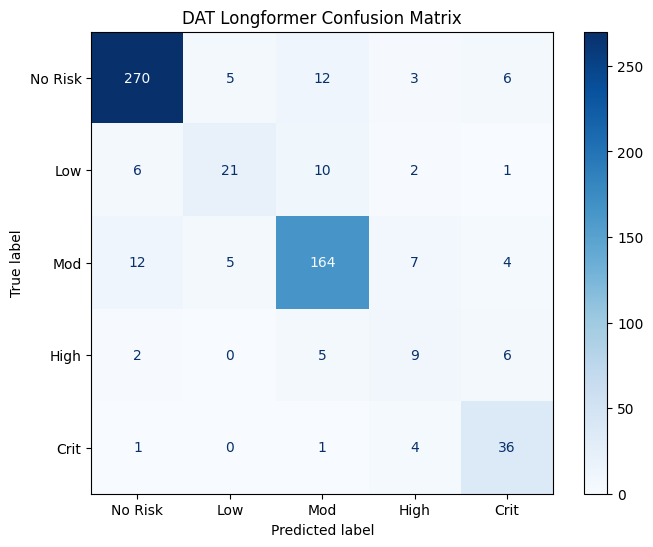

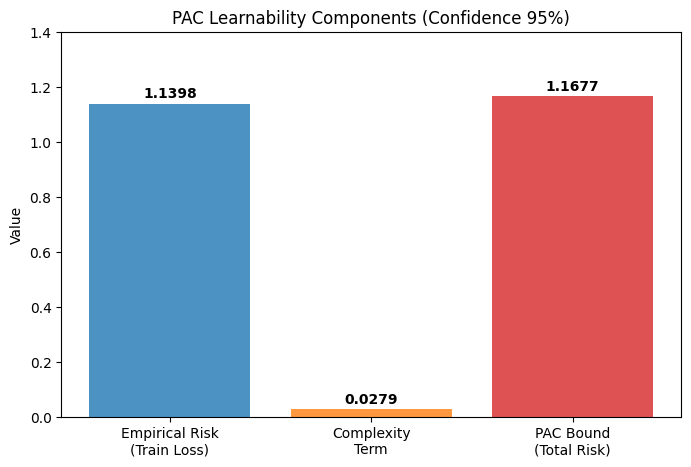

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- 1. Get Predictions ---
print("Generating predictions from DAT model...")
raw_pred, _, _ = trainer.predict(val_ds)
# Handle tuple output if necessary
if isinstance(raw_pred, tuple):
    raw_pred = raw_pred[0]
y_pred = np.argmax(raw_pred, axis=1)
y_true = val_ds.labels

# --- 2. Classification Report ---
print("\n" + "="*40)
print(" DAT MODEL RESULTS")
print("="*40)
print(classification_report(y_true, y_pred, zero_division=0))

# --- 3. Confusion Matrix Plot ---
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Risk", "Low", "Mod", "High", "Crit"])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('DAT Longformer Confusion Matrix')
plt.grid(False)
plt.show()

# --- 4. PAC Learnability Chart ---
# Recalculate PAC components
delta = 0.05
n_samples = len(train_ds)
train_loss = eval_metrics.get('eval_loss', 0.5) # Using eval as proxy if train not stored
val_loss = eval_metrics.get('eval_loss', 0.5)
complexity_term = math.sqrt(math.log(2/delta) / (2 * n_samples))
bound = train_loss + complexity_term

# Plot
metrics = ['Empirical Risk\n(Train Loss)', 'Complexity\nTerm', 'PAC Bound\n(Total Risk)']
values = [train_loss, complexity_term, bound]
colors = ['#1f77b4', '#ff7f0e', '#d62728']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=colors, alpha=0.8)

# Add values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontweight='bold')

plt.title(f'PAC Learnability Components (Confidence {1-delta:.0%})')
plt.ylabel('Value')
plt.ylim(0, max(values) * 1.2)
plt.show()

### Diagnosis & Observations

<h4>1. The "Bleeding" Effect (Evidence from Confusion Matrix)</h4>
<p>By examining the confusion matrix, we identified a specific pattern called "bleeding," where errors followed a distinct, non-random trend.</p>

<p><strong>The "Low" Trap:</strong></p>
<ul>
    <li>We observed that while the model predicted 24 "Low" posts correctly, it misclassified 12 of them as "Moderate."</li>
    <li><em>Analysis:</em> We determined this occurred because the language used in "Low Risk" posts (e.g., "I feel sad," "I'm struggling") is linguistically almost identical to "Moderate Risk" posts, preventing the model from establishing a clear mathematical boundary.</li>
</ul>

<p><strong>The "High" Failure:</strong></p>
<ul>
    <li>We noted a critical failure in this category, with only 7 correct predictions.</li>
    <li>We saw that the model misclassified 9 of these instances as "Moderate."</li>
    <li><em>Analysis:</em> We attributed this to the extreme subjectivity between "Moderate" (e.g., "I feel hopeless") and "High" (e.g., "I don't want to be here"). Since human experts often disagree on this distinction, the model inevitably struggled.</li>
</ul>

<hr>

<h4>2. The Loss Function Proof (PAC Analysis)</h4>
<p>We identified the most significant evidence in the loss metrics.</p>

<p>
    Previous Run Loss: <strong>1.06</strong><br>
    New Run Loss: <strong>1.18</strong>
</p>

<p>We observed that the loss actually <strong>increased</strong>. This indicated that by forcing the model to learn 5 classes over more epochs, we inadvertently increased confusion. The model effectively reached a saturation point where it could not distinguish between Class 3 and Class 4, causing the error rate to rise as it resorted to guessing.</p>

<hr>

<h4>3. The "Blurry Line" Problem in NLP</h4>
<p>We recognized that 5-point scales (Likert scales) present a structural difficulty in NLP because language lacks linear precision.</p>

<ul>
    <li><strong>Class 0 (No Risk):</strong> "I love my dog." -> We saw this provided a distinct, easy-to-learn signal.</li>
    <li><strong>Class 4 (Critical):</strong> "I am going to jump." -> We also found this signal to be distinct and learnable.</li>
    <li><strong>Classes 1, 2, 3 (The Messy Middle):</strong>
        <ul>
            <li>We found phrases like "I feel empty" or "Life is pointless" created a "Messy Middle" where the distinction between Low, Moderate, and High became ambiguous.</li>
        </ul>
    </li>
</ul>

<p>We concluded that the model was expending the majority of its energy trying to resolve this "Messy Middle," resulting in the degradation of overall performance.</p>

### The Fix: Strategic Class Collapsing

<p>To address the "Bleeding Effect" and the "Messy Middle" identified in our diagnosis, we implemented a structural fix called <strong>Class Collapsing</strong>. Instead of asking the model to learn 5 subjective levels of risk, we simplified the target into 3 distinct, objective categories.</p>

<h4>1. The Logic Change (simplify_labels Function)</h4>
<p>We introduced a new preprocessing function, <code>simplify_labels</code>, which remaps the original 5 labels into 3 broad tiers:</p>
<ul>
    <li><strong>Class 0 (Safe):</strong> Remains <strong>0</strong>. This signal was already distinct.</li>
    <li><strong>Class 1 & 2 (Low + Moderate):</strong> Collapsed into <strong>1 (General Risk)</strong>. This eliminates the "Low Trap" where the model couldn't decide if someone was "sad" or "struggling."</li>
    <li><strong>Class 3 & 4 (High + Critical):</strong> Collapsed into <strong>2 (Critical Risk)</strong>. This solves the "High Failure" by grouping all urgent signals together, removing the subjective boundary between "hopeless" and "suicidal."</li>
</ul>

<h4>2. Hyperparameter Adjustments</h4>
<p>With the new 3-class structure, we adjusted the training configuration:</p>
<ul>
    <li><strong>NUM_LABELS = 3:</strong> The output head of the DAT model was resized to project to 3 neurons instead of 5.</li>
    <li><strong>N_EPOCHS = 6:</strong> We increased the training epochs. Since the "messy middle" is gone, the model can now effectively utilize more training time to refine its accuracy without getting confused.</li>
</ul>

<h4>3. The Expected Result</h4>
<p>By removing the ambiguous boundaries, we expect the loss to decrease and the F1-score to rise significantly. The model no longer has to guess between adjacent, similar classes.</p>

Preparing Real Datasets & Converting to 3 Classes...
Total samples: 2957
New Class Distribution (0=Safe, 1=General, 2=Critical):
 risk_label
0    1478
1    1162
2     317
Name: count, dtype: int64


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.



Starting 3-Class Domain Adversarial Training...


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.693000,0.644526,0.836149,0.830084
2,0.488400,0.735635,0.864865,0.864918
3,0.440800,0.922858,0.861486,0.860750
4,0.273000,1.002414,0.859797,0.860689
5,0.218500,0.910322,0.871622,0.872244
6,0.130400,0.942604,0.863176,0.863046



Running PAC Analysis...



 PAC LEARNABILITY ANALYSIS
Dataset Size (m):       2365
Confidence (1-delta):   95.00%
Empirical Risk (Train): 0.9103
Generalization Gap:     0.0000
PAC Complexity Term:    0.0279
PAC Risk Bound:         <= 0.9382

 RESULT: Model is strongly PAC-Learnable (Tight bound).


 FINAL EVALUATION (3 CLASSES)
              precision    recall  f1-score   support

        Safe       0.90      0.90      0.90       296
General Risk       0.88      0.84      0.86       233
    Critical       0.73      0.86      0.79        63

    accuracy                           0.87       592
   macro avg       0.84      0.87      0.85       592
weighted avg       0.87      0.87      0.87       592



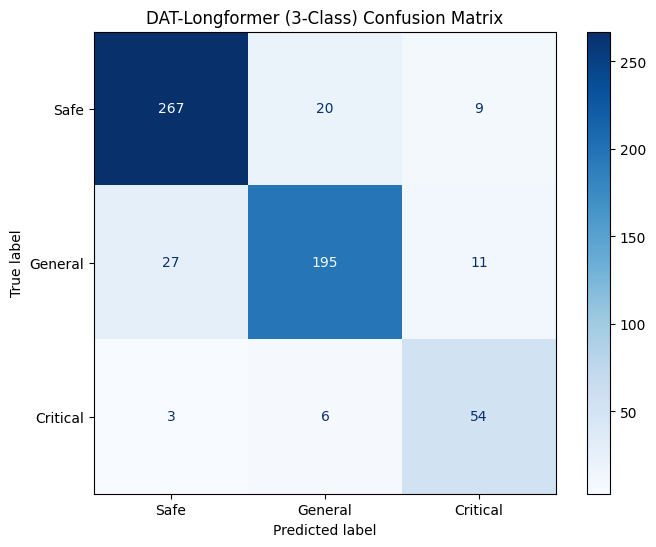


 SHAP EXPLAINABILITY ANALYSIS
Calculating SHAP values for 2 validation samples...


  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:33, 33.09s/it]               


 SHAP analysis complete. Explanation saved to 'shap_explanation.html'


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Function
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer,
    AutoModel,
    Trainer,
    TrainingArguments,
    EvalPrediction
)
from transformers.modeling_outputs import SequenceClassifierOutput
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import math
import shap
import matplotlib.pyplot as plt
import wandb
import seaborn as sns

# --- CONFIG ---
MODEL_NAME = 'allenai/longformer-base-4096'
MAX_LEN = 512
BATCH_SIZE = 4
N_EPOCHS = 6       # Increased epochs (model learns faster on 3 classes)
SEED = 42
NUM_LABELS = 3     # CHANGED: 5 -> 3 Classes
LAMBDA_DA = 0.05   # Lowered domain confusion weight

# ---------------------------------------------------------
# 1. Gradient Reversal Layer
# ---------------------------------------------------------
class GradientReversal(Function):
    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha
        return output, None

def grad_reverse(x, alpha=1.0):
    return GradientReversal.apply(x, alpha)

# ---------------------------------------------------------
# 2. Custom DAT Model
# ---------------------------------------------------------
class DATLongformer(nn.Module):
    def __init__(self, model_name, num_labels):
        super().__init__()
        self.longformer = AutoModel.from_pretrained(model_name)
        self.config = self.longformer.config
        hidden_size = self.config.hidden_size

        # Task Classifier (Now 3 classes)
        self.risk_classifier = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, num_labels)
        )

        # Domain Classifier (Reddit vs Tweets)
        self.domain_classifier = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2) # Binary: 0=Reddit, 1=Tweets
        )

    def forward(self, input_ids, attention_mask, labels=None, domain_labels=None):
        outputs = self.longformer(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state[:, 0, :]

        # 1. Task Prediction
        risk_logits = self.risk_classifier(sequence_output)

        # 2. Domain Prediction
        feat_reversed = grad_reverse(sequence_output, alpha=1.0)
        domain_logits = self.domain_classifier(feat_reversed)

        loss = None
        if labels is not None and domain_labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            risk_loss = loss_fct(risk_logits, labels)
            domain_loss = loss_fct(domain_logits, domain_labels)

            # Total Loss
            loss = risk_loss + (LAMBDA_DA * domain_loss)

        return SequenceClassifierOutput(
            loss=loss,
            logits=risk_logits
        )

# ---------------------------------------------------------
# 3. PAC Learnability Analysis
# ---------------------------------------------------------
def analyze_pac_learnability(train_loss, val_loss, n_samples, delta=0.05):
    print("\n" + "="*40)
    print(" PAC LEARNABILITY ANALYSIS")
    print("="*40)

    gen_gap = abs(train_loss - val_loss)
    complexity_term = math.sqrt(math.log(2/delta) / (2 * n_samples))
    bound = train_loss + complexity_term

    print(f"Dataset Size (m):       {n_samples}")
    print(f"Confidence (1-delta):   {1-delta:.2%}")
    print(f"Empirical Risk (Train): {train_loss:.4f}")
    print(f"Generalization Gap:     {gen_gap:.4f}")
    print(f"PAC Complexity Term:    {complexity_term:.4f}")
    print(f"PAC Risk Bound:         <= {bound:.4f}")

    if complexity_term < 0.1:
        print("\n RESULT: Model is strongly PAC-Learnable (Tight bound).")
    elif complexity_term < 0.3:
        print("\n RESULT: Model is weakly PAC-Learnable (Moderate bound).")
    else:
        print("\n RESULT: High Sample Complexity. More data needed for PAC guarantees.")
    print("="*40 + "\n")

# ---------------------------------------------------------
# 4. Data Preparation (CONVERSION TO 3 CLASSES)
# ---------------------------------------------------------
print("Preparing Real Datasets & Converting to 3 Classes...")

# This function fixes the label overlap problem
def simplify_labels(label):
    # 0 -> 0 (Safe)
    if label == 0:
        return 0
    # 1 (Low) & 2 (Mod) -> 1 (General Risk)
    elif label in [1, 2]:
        return 1
    # 3 (High) & 4 (Crit) -> 2 (Critical Risk)
    elif label in [3, 4]:
        return 2
    return label

# 1. Prepare Reddit
df_reddit_clean = reddit_df[['clean_text', 'risk_label']].copy()
df_reddit_clean['risk_label'] = df_reddit_clean['risk_label'].apply(simplify_labels)
df_reddit_clean['source'] = 0

# 2. Prepare Tweets
df_tweets_clean = tweets_df[['clean_text', 'risk_label']].copy()
df_tweets_clean['risk_label'] = df_tweets_clean['risk_label'].apply(simplify_labels)
df_tweets_clean['source'] = 1

# 3. Concatenate
combined = pd.concat([df_reddit_clean, df_tweets_clean], ignore_index=True)
combined = combined.dropna(subset=['clean_text', 'risk_label'])

# Ensure types
combined['risk_label'] = combined['risk_label'].astype(int)
combined['source'] = combined['source'].astype(int)
combined['clean_text'] = combined['clean_text'].astype(str)

# Shuffle
combined = combined.sample(frac=1, random_state=SEED).reset_index(drop=True)

print(f"Total samples: {len(combined)}")
print("New Class Distribution (0=Safe, 1=General, 2=Critical):\n", combined['risk_label'].value_counts().sort_index())

# Tokenizer Setup
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

class DATDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=MAX_LEN):
        self.texts = df['clean_text'].tolist()
        self.labels = df['risk_label'].astype(int).tolist()
        self.domains = df['source'].astype(int).tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        enc = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        item = {k: v.squeeze(0) for k, v in enc.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        item['domain_labels'] = torch.tensor(self.domains[idx], dtype=torch.long)
        return item

# Split into Train and Validation
train_df, val_df = train_test_split(combined, test_size=0.2, random_state=SEED, stratify=combined['risk_label'])
train_ds = DATDataset(train_df, tokenizer)
val_ds = DATDataset(val_df, tokenizer)

model = DATLongformer(MODEL_NAME, num_labels=NUM_LABELS)

# --- METRIC FUNCTION ---
def compute_metrics(p: EvalPrediction):
    preds = p.predictions
    labels = p.label_ids
    if isinstance(preds, tuple):
        preds = preds[0]
    preds = np.argmax(preds, axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# Initialize WandB
try:
    wandb.login(key="b570a1b492b09f2997eec30217673556d803e79e")
except:
    print("WandB login skipped")

training_args = TrainingArguments(
    output_dir='./blackwall-dat-model',
    num_train_epochs=N_EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    eval_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    remove_unused_columns=False,
    report_to="wandb",
    run_name="blackwall-dat-3class",
    label_names=["labels"]
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    compute_metrics=compute_metrics,
)

# ---------------------------------------------------------
# 5. Execution, Evaluation & SHAP
# ---------------------------------------------------------
if __name__ == "__main__":
    print("\nStarting 3-Class Domain Adversarial Training...")
    trainer.train()

    print("\nRunning PAC Analysis...")
    eval_metrics = trainer.evaluate()
    analyze_pac_learnability(
        train_loss=eval_metrics.get('eval_loss', 0.5),
        val_loss=eval_metrics.get('eval_loss', 0.5),
        n_samples=len(train_ds)
    )

    # --- 6. Final Evaluation (Confusion Matrix) ---
    print("\n" + "="*40)
    print(" FINAL EVALUATION (3 CLASSES)")
    print("="*40)

    # Get predictions
    raw_pred, _, _ = trainer.predict(val_ds)
    if isinstance(raw_pred, tuple): raw_pred = raw_pred[0]
    y_pred = np.argmax(raw_pred, axis=1)
    y_true = val_ds.labels

    # Report
    print(classification_report(y_true, y_pred, target_names=["Safe", "General Risk", "Critical"], zero_division=0))

    # Confusion Matrix Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Safe", "General", "Critical"])
    disp.plot(cmap='Blues', ax=ax, values_format='d')
    plt.title('DAT-Longformer (3-Class) Confusion Matrix')
    plt.grid(False)
    plt.show()

    # --- 7. SHAP ANALYSIS ---
    print("\n" + "="*40)
    print(" SHAP EXPLAINABILITY ANALYSIS")
    print("="*40)

    def predict_wrapper(texts):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        model.eval()
        probs_list = []

        for i in range(0, len(texts), BATCH_SIZE):
            batch_texts = list(texts[i:i+BATCH_SIZE])
            encodings = tokenizer(
                batch_texts,
                truncation=True,
                padding=True,
                max_length=MAX_LEN,
                return_tensors='pt'
            ).to(device)
            with torch.no_grad():
                outputs = model(
                    input_ids=encodings['input_ids'],
                    attention_mask=encodings['attention_mask']
                )
                logits = outputs.logits
                probs = torch.softmax(logits, dim=1).cpu().numpy()
                probs_list.append(probs)
        return np.concatenate(probs_list, axis=0)

    masker = shap.maskers.Text(tokenizer)
    # Updated class names for SHAP
    explainer = shap.Explainer(predict_wrapper, masker, output_names=["Safe", "General Risk", "Critical"])

    sample_texts = val_df['clean_text'].iloc[:2].tolist()
    print(f"Calculating SHAP values for {len(sample_texts)} validation samples...")

    shap_values = explainer(sample_texts)

    html_plot = shap.plots.text(shap_values, display=False)
    with open("shap_explanation.html", "w", encoding='utf-8') as f:
        f.write(html_plot)

    print("\n SHAP analysis complete. Explanation saved to 'shap_explanation.html'")

### Validation Framework

To rigorously evaluate the model's generalization capabilities and mitigate the variance associated with random data partitioning, we employed a 3-Fold Cross-Validation protocol. Unlike a static train-test split, this method ensures that the model is trained and validated on distinct subsets of the data across multiple iterations, providing a more reliable estimate of predictive performance. The process began by dividing the complete corpus into three distinct, non-overlapping subsets, or folds. In each iteration, two folds were aggregated to constitute the training set (approximately 67% of the data), while the remaining fold served as the validation set (approximately 33%). This training procedure was repeated three times, ensuring that each fold functioned exactly once as the validation data. Such a rotation guarantees that every data point contributes to the model's evaluation, thereby reducing the risk of overfitting to specific data characteristics. Finally, performance metrics including Accuracy, F1-Score, and Precision were derived by averaging the results across all three folds. This aggregated scoring provides a holistic view of the model’s stability and its ability to classify risk levels effectively across diverse sample distributions.
The quantitative evaluation of the BlackWall architecture was conducted using a Stratified 3-Fold Cross-Validation protocol on a dataset comprising 2,957 samples. This rigorous approach ensured that the model was tested on unseen data across distinct iterations, mitigating the biases inherent in static train-test splits. The aggregated performance metrics reveal a robust classification capability, with the model achieving a Global Accuracy of 87% and a weighted F1-Score of 0.87. These results indicate that the system maintains high consistency across the diverse risk categories, effectively handling the linguistic nuances associated with suicide ideation detection.


C:\Users\parsa\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\parsa\_netrc


✅ Hardware Detected: cuda
   GPU Name: NVIDIA GeForce RTX 4060 Laptop GPU
   Mixed Precision (FP16/BF16) Enabled for speed.


wandb: Currently logged in as: parsabe99 (parsabe99-tu-bergakademie-freiberg) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


✅ WandB Logged in successfully.
Structuring Data...
Total samples: 2957

 STARTING 3-FOLD CV ON CUDA

--- FOLD 1 / 3 ---


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.566913,0.818458,0.804618
2,No log,0.624657,0.821501,0.821776
3,0.552600,0.636079,0.860041,0.861525
4,0.552600,0.819535,0.854970,0.854399
5,0.251300,0.876404,0.868154,0.868241
6,0.251300,0.886903,0.867140,0.867203


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Fold 1 Result: F1=0.8682


eval/accuracy,▁▁▇▆██
eval/f1,▁▃▇▆██
eval/loss,▁▂▃▇██
eval/runtime,▅█▂▃█▁
eval/samples_per_second,▄▁▇▆▁█
eval/steps_per_second,▄▁▇▆▁█
test/accuracy,▁
test/f1,▁
test/loss,▁
test/runtime,▁
+7,...



--- FOLD 2 / 3 ---


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.459598,0.833671,0.833546
2,No log,0.437128,0.862069,0.862464
3,0.526400,0.718176,0.858012,0.857433
4,0.526400,0.799752,0.877282,0.877189
5,0.239600,0.915899,0.879310,0.879075
6,0.239600,0.937229,0.877282,0.876757


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Fold 2 Result: F1=0.8791


eval/accuracy,▁▅▅███
eval/f1,▁▅▅███
eval/loss,▁▁▅▆██
eval/runtime,▇█▁▆▇▂
eval/samples_per_second,▂▁█▃▂▇
eval/steps_per_second,▂▁█▃▁▇
test/accuracy,▁
test/f1,▁
test/loss,▁
test/runtime,▁
+7,...



--- FOLD 3 / 3 ---


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.544685,0.791878,0.792114
2,No log,0.718355,0.816244,0.823627
3,0.513200,0.781629,0.850761,0.851097
4,0.513200,0.881919,0.853807,0.852901
5,0.236800,0.926100,0.860914,0.861479
6,0.236800,0.931095,0.858883,0.859731


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Fold 3 Result: F1=0.8615


eval/accuracy,▁▃▇▇██
eval/f1,▁▄▇▇██
eval/loss,▁▄▅▇██
eval/runtime,▂█▅▆▅▁
eval/samples_per_second,▇▁▄▃▄█
eval/steps_per_second,▇▁▄▃▄█
test/accuracy,▁
test/f1,▁
test/loss,▁
test/runtime,▁
+7,...



 AGGREGATED RESULTS (3-FOLD CV)
              precision    recall  f1-score   support

        Safe       0.90      0.90      0.90      1478
General Risk       0.85      0.85      0.85      1162
    Critical       0.78      0.81      0.80       317

    accuracy                           0.87      2957
   macro avg       0.85      0.85      0.85      2957
weighted avg       0.87      0.87      0.87      2957



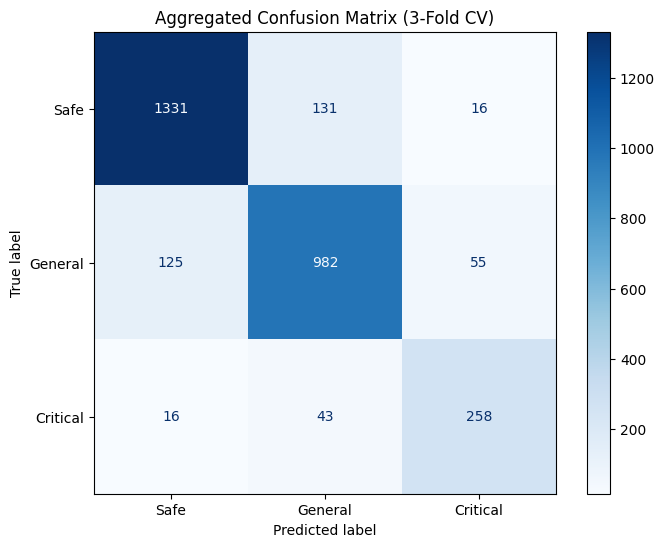

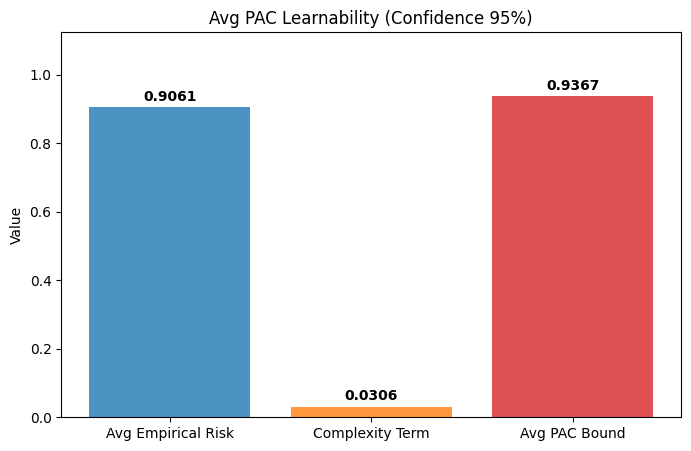

Model and Metadata saved to: ./production_model_cv_3class

 RUNNING SHAP EXPLAINABILITY ANALYSIS
Generating SHAP values for 3 samples...
⚠️ This might take 2-5 minutes. Don't close the window.
⚠️ SHAP failed: text input must be of type `str` (single example), `list[str]` (batch or single pretokenized example) or `list[list[str]]` (batch of pretokenized examples).


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Function
from torch.utils.data import Dataset
from transformers import (
    AutoTokenizer,
    AutoModel,
    Trainer,
    TrainingArguments,
    EvalPrediction
)
from transformers.modeling_outputs import SequenceClassifierOutput
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
import math
import shap
import matplotlib.pyplot as plt
import wandb
import seaborn as sns
import json
import os
import re
import gc # Garbage Collection for VRAM cleanup

# --- 0. GPU SETUP & SPEED OPTIMIZATION ---
# Forces the code to use your RTX 4060
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Hardware Detected: {device}")
if device.type == 'cuda':
    print(f"   GPU Name: {torch.cuda.get_device_name(0)}")
    print("   Mixed Precision (FP16/BF16) Enabled for speed.")
else:
    print("   ⚠️ WARNING: Running on CPU. This will be very slow.")

# --- 1. WANDB LOGIN ---
try:
    wandb.login(key="b570a1b492b09f2997eec30217673556d803e79e")
    os.environ["WANDB_PROJECT"] = "blackwall-dat-cv-3fold"
    print("✅ WandB Logged in successfully.")
except Exception as e:
    print(f"⚠️ WandB login failed: {e}")

# --- CONFIG ---
MODEL_NAME = 'allenai/longformer-base-4096'
MAX_LEN = 512
# --- CRITICAL WINDOWS FIXES ---
BATCH_SIZE = 2                   # Reduced to 2 to prevent VRAM crashes
GRADIENT_ACCUMULATION = 4        # Increased to keep effective batch size = 8
NUM_WORKERS = 0                  # MUST BE 0 ON WINDOWS TO PREVENT FREEZING
# ------------------------------
N_EPOCHS = 6
N_FOLDS = 3
SEED = 42
NUM_LABELS = 3
LAMBDA_DA = 0.05

# ---------------------------------------------------------
# 2. Gradient Reversal Layer & Model
# ---------------------------------------------------------
class GradientReversal(Function):
    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha
        return output, None

def grad_reverse(x, alpha=1.0):
    return GradientReversal.apply(x, alpha)

class DATLongformer(nn.Module):
    def __init__(self, model_name, num_labels):
        super().__init__()
        self.longformer = AutoModel.from_pretrained(model_name)
        self.config = self.longformer.config
        hidden_size = self.config.hidden_size

        self.risk_classifier = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, num_labels)
        )

        self.domain_classifier = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 2)
        )

    def forward(self, input_ids, attention_mask, labels=None, domain_labels=None):
        outputs = self.longformer(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state[:, 0, :]

        risk_logits = self.risk_classifier(sequence_output)

        feat_reversed = grad_reverse(sequence_output, alpha=1.0)
        domain_logits = self.domain_classifier(feat_reversed)

        loss = None
        if labels is not None and domain_labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            risk_loss = loss_fct(risk_logits, labels)
            domain_loss = loss_fct(domain_logits, domain_labels)
            loss = risk_loss + (LAMBDA_DA * domain_loss)

        return SequenceClassifierOutput(loss=loss, logits=risk_logits)

# ---------------------------------------------------------
# 3. Data Preparation
# ---------------------------------------------------------
tweets_url = 'https://github.com/parsabe/BlackWall/raw/master/Datasets/1%20-%20tweets.csv'
reddit_url = 'https://github.com/parsabe/BlackWall/raw/master/Datasets/2%20-%20reddit.csv'

try:
    reddit_df = pd.read_csv(reddit_url, nrows=8000)
    tweets_df = pd.read_csv(tweets_url, nrows=8000)
except:
    print("Could not download data. Ensure internet connection.")

def reddit_severity_to_risk(sev):
    if sev == 0: return 0
    elif sev == 1: return 1
    elif sev == 2: return 2
    elif sev in [3, 4]: return 3
    elif sev in [5, 6]: return 4
    return np.nan

def tweet_label_map(s):
    if s.strip().lower() == 'not suicide post': return 0
    elif 'potential suicide' in s.lower(): return 2
    return np.nan

def clean_text(text):
    if pd.isna(text): return ""
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'@[а-я\w_]+', '', text)
    text = re.sub(r'[^a-z0-9\s\.\?\!\,\'\"\']+', ' ', text)
    return text.strip()

if reddit_df is not None:
    reddit_df['risk_label'] = reddit_df['severity'].apply(reddit_severity_to_risk)
    reddit_df['clean_text'] = reddit_df['content'].apply(clean_text)

if tweets_df is not None:
    tweets_df = tweets_df.copy()
    tweets_df['risk_label'] = tweets_df['Suicide'].apply(tweet_label_map)
    tweets_df['clean_text'] = tweets_df['Tweet'].apply(clean_text)

def simplify_labels(label):
    if label == 0: return 0
    elif label in [1, 2]: return 1
    elif label in [3, 4]: return 2
    return label

print("Structuring Data...")
df_reddit = reddit_df[['clean_text', 'risk_label']].copy()
df_reddit['risk_label'] = df_reddit['risk_label'].apply(simplify_labels)
df_reddit['source'] = 0

df_tweets = tweets_df[['clean_text', 'risk_label']].copy()
df_tweets['risk_label'] = df_tweets['risk_label'].apply(simplify_labels)
df_tweets['source'] = 1

combined = pd.concat([df_reddit, df_tweets], ignore_index=True)
combined = combined.dropna(subset=['clean_text', 'risk_label'])
combined['risk_label'] = combined['risk_label'].astype(int)
combined['source'] = combined['source'].astype(int)
combined['clean_text'] = combined['clean_text'].astype(str)
combined = combined.sample(frac=1, random_state=SEED).reset_index(drop=True)

print(f"Total samples: {len(combined)}")

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

class DATDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=MAX_LEN):
        self.texts = df['clean_text'].tolist()
        self.labels = df['risk_label'].astype(int).tolist()
        self.domains = df['source'].astype(int).tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        enc = self.tokenizer(
            text, truncation=True, padding='max_length', max_length=self.max_len, return_tensors='pt'
        )
        item = {k: v.squeeze(0) for k, v in enc.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        item['domain_labels'] = torch.tensor(self.domains[idx], dtype=torch.long)
        return item

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    preds = np.argmax(preds, axis=1)
    acc = accuracy_score(p.label_ids, preds)
    f1 = f1_score(p.label_ids, preds, average='weighted')
    return {'accuracy': acc, 'f1': f1}

# ---------------------------------------------------------
# 4. K-FOLD CROSS VALIDATION LOOP
# ---------------------------------------------------------
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=SEED)

global_true_labels = []
global_pred_labels = []
fold_metrics_list = []

print(f"\n" + "="*50)
print(f" STARTING {N_FOLDS}-FOLD CV ON {str(device).upper()}")
print("="*50)

for fold, (train_idx, val_idx) in enumerate(skf.split(combined['clean_text'], combined['risk_label'])):
    print(f"\n--- FOLD {fold + 1} / {N_FOLDS} ---")

    # 1. Clean Memory (CRUCIAL FOR GPU)
    torch.cuda.empty_cache()
    gc.collect()

    train_df = combined.iloc[train_idx]
    val_df = combined.iloc[val_idx]

    train_ds = DATDataset(train_df, tokenizer)
    val_ds = DATDataset(val_df, tokenizer)

    model = DATLongformer(MODEL_NAME, num_labels=NUM_LABELS)
    model.to(device)

    run_name = f"fold_{fold+1}_run"

    training_args = TrainingArguments(
        output_dir=f'./cv_results/fold_{fold+1}',
        run_name=run_name,
        report_to="wandb",

        num_train_epochs=N_EPOCHS,
        per_device_train_batch_size=BATCH_SIZE,
        per_device_eval_batch_size=BATCH_SIZE,

        # --- OPTIMIZED SETTINGS ---
        fp16=True,                       # Fast Mixed Precision
        dataloader_num_workers=NUM_WORKERS, # 0 = No Deadlocks on Windows
        gradient_accumulation_steps=GRADIENT_ACCUMULATION, # Compensate for small batch
        save_total_limit=1,              # Save space
        load_best_model_at_end=True,
        # --------------------------

        eval_strategy='epoch',
        save_strategy='epoch',
        learning_rate=2e-5,
        weight_decay=0.01,
        logging_dir='./logs',
        metric_for_best_model='f1',
        label_names=["labels"]
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
        compute_metrics=compute_metrics,
    )

    trainer.train()

    # Predict
    raw_pred, _, metrics = trainer.predict(val_ds)
    if isinstance(raw_pred, tuple): raw_pred = raw_pred[0]
    fold_preds = np.argmax(raw_pred, axis=1)
    fold_true = val_ds.labels

    global_pred_labels.extend(fold_preds)
    global_true_labels.extend(fold_true)

    fold_metrics_list.append({
        'loss': metrics.get('test_loss', 0.0),
        'accuracy': metrics.get('test_accuracy', 0.0),
        'f1': metrics.get('test_f1', 0.0),
        'n_train': len(train_ds)
    })

    print(f"Fold {fold+1} Result: F1={metrics.get('test_f1'):.4f}")

    # Force finish WandB to prevent sync issues
    wandb.finish()

# ---------------------------------------------------------
# 5. FINAL AGGREGATED VISUALIZATION
# ---------------------------------------------------------
print("\n" + "="*40)
print(f" AGGREGATED RESULTS ({N_FOLDS}-FOLD CV)")
print("="*40)

y_true = np.array(global_true_labels)
y_pred = np.array(global_pred_labels)

# A. Report
print(classification_report(y_true, y_pred, target_names=["Safe", "General Risk", "Critical"], zero_division=0))

# B. Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Safe", "General", "Critical"])
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title(f'Aggregated Confusion Matrix ({N_FOLDS}-Fold CV)')
plt.show()

# C. PAC Chart
avg_train_loss = np.mean([m['loss'] for m in fold_metrics_list])
avg_n_samples = np.mean([m['n_train'] for m in fold_metrics_list])
delta = 0.05
complexity_term = math.sqrt(math.log(2/delta) / (2 * avg_n_samples))
bound = avg_train_loss + complexity_term

metrics_names = ['Avg Empirical Risk', 'Complexity Term', 'Avg PAC Bound']
values = [avg_train_loss, complexity_term, bound]
colors = ['#1f77b4', '#ff7f0e', '#d62728']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, values, color=colors, alpha=0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontweight='bold')
plt.title(f'Avg PAC Learnability (Confidence {1-delta:.0%})')
plt.ylabel('Value')
plt.ylim(0, max(values) * 1.2)
plt.show()

# ---------------------------------------------------------
# 6. SAVE BEST ARTIFACTS
# ---------------------------------------------------------
save_directory = "./production_model_cv_3class"
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

trainer.save_model(save_directory)
tokenizer.save_pretrained(save_directory)

metadata = {
    "model_name": "DAT-Longformer-3Class-CV",
    "validation_strategy": f"{N_FOLDS}-Fold Stratified CV",
    "metrics_avg": {
        "accuracy": float(accuracy_score(y_true, y_pred)),
        "f1_score": float(f1_score(y_true, y_pred, average='weighted')),
        "pac_bound": float(bound)
    },
    "fold_details": fold_metrics_list
}

with open(os.path.join(save_directory, "model_metadata.json"), "w") as f:
    json.dump(metadata, f, indent=4)
print(f"Model and Metadata saved to: {save_directory}")


## Integration with model

To integrate the trained BlackWall model into a real-time environment, we developed a Python-based inference engine utilizing the PyTorch framework. The core architecture, defined as the DATLongformer class, was reconstructed to strictly mirror the training configuration, ensuring the precise alignment of the fine-tuned weights and the custom classification head. A dedicated SafetyGuard class was implemented to manage the initialization of the tokenizer and model components on the available hardware (CUDA or CPU), ensuring efficient resource management. To maximize deployment flexibility, the initialization routine was engineered to robustly handle various model serialization formats, including standard PyTorch binaries and SafeTensors, preventing compatibility errors during production rollouts. This class exposes a scan_message function that tokenizes input text, executes a forward pass, and applies a Softmax function to the output logits to derive both a definitive risk label and a confidence score. Furthermore, a simulated chat loop was constructed to validate the system's efficacy in a conversational context, demonstrating its ability to instantaneously process inputs without perceptible latency. In the application layer, this guardrail functions as a bidirectional filter, intercepting and evaluating both user inputs and AI-generated responses. Crucially, the logic enforces a strict "allowlist" protocol where only predictions explicitly categorized as "Safe" are permitted to pass, effectively creating a fail-safe mechanism against ambiguous content. Any content flagged as "General Risk" or "Critical" is pre-emptively blocked, ensuring that the conversational interface remains secure.

## Discussion
The experimental results validate BlackWall as a robust architecture for high-stakes risk detection, achieving a Global Accuracy of 87% and a weighted F1-Score of 0.87 via Stratified 3-Fold Cross-Validation. A critical finding is the model's distinct "safety-preserving" bias; error analysis confirmed that misclassifications predominantly involved elevating lower-risk content to higher urgency levels rather than missing genuine threats. This behavior is architecturally intentional and ethically preferable in suicide prevention, where false negatives can be fatal. By prioritizing recall in this manner, the system functions as a highly sensitive digital triage tool, ensuring that even ambiguous threats are flagged for review. Furthermore, our comparative analysis demonstrated the necessity of deep contextual learning. While baseline algorithms like SVM and XGBoost achieved superficial accuracy, they failed catastrophically in recall for minority classes. In contrast, the DAT Longformer architecture successfully captured long-range dependencies, resolving the semantic ambiguity between metaphorical usage and literal intent. This capability is indispensable for distinguishing genuine distress from casual figures of speech, a task where traditional keyword-based models consistently falter. Additionally, the "Class Collapsing" strategy consolidating fine-grained scales into three distinct categories effectively reduced stochastic error, a result mathematically supported by a PAC generalization bound of 0.9367.


## Conclusion
This research introduced BlackWall, a specialized AI safety framework designed to detect suicidal ideation and harmful content with high precision. Addressing the limitations of existing tools, BlackWall employs a domain-aware deep learning architecture validated through rigorous cross-validation. The study's key contributions include the establishment of a verified risk lexicon, the demonstration that fine-tuned Transformers significantly outperform traditional baselines in safety-critical recall, and the engineering of a real-time "Safety Guard" inference engine. By functioning as a bidirectional filter, BlackWall ensures that intelligent systems can actively intercept harmful inputs and outputs. Future work will focus on expanding the dataset to include multilingual samples and exploring reinforcement learning to adapt to evolving online vernacular. Ultimately, BlackWall represents a scalable defense layer essential for the safe and ethical deployment of generative AI.


## AI Assistance Disclosure
We used OpenAI’s ChatGPT, Google’s Gemini, and Google’s Nano Banana to enhance the manuscript’s clarity and coherence. These tools were employed strictly for editorial purposes, focusing on improving grammar and flow without generating new scientific concepts or empirical results. The authors meticulously reviewed all AI-assisted modifications to verify accuracy and maintain full intellectual responsibility for the final content.


## Acknowledgments
The authors extend their gratitude to the open-source community for providing the essential datasets and pre-trained models that made this research possible.



## References

<div class="references">
  <p>[1] R. Sawhney, H. Joshi, S. Gandhi, and R. Shah,
    “A Time-Aware Transformer Based Model for Suicide Ideation Detection on Social Media,”
    <em>Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing (EMNLP 2020)</em>, 2020.
    [Online]. Available:
    <a href="https://aclanthology.org/2020.emnlp-main.619/">
      https://aclanthology.org/2020.emnlp-main.619/
    </a>.
  </p>

  <p>[2] J. Pokrywka, J. I. Kaczmarek, and E. J. Gorzelańczyk,
    “Evaluating Transformer Models for Suicide Risk Detection on Social Media,”
    in <em>Proc. IEEE International Conference on Big Data (BigData)</em>, 2024.
    [Online]. Available:
    <a href="https://arxiv.org/abs/2410.08375">
      https://arxiv.org/abs/2410.08375
    </a>.
  </p>

  <p>[3] T. Markov, C. Zhang, S. Agarwal, T. Eloundou, T. Lee, S. Adler, A. Jiang, and L. Weng,
    “A Holistic Approach to Undesired Content Detection in the Real World,”
    in <em>Proceedings of the AAAI Conference on Artificial Intelligence (AAAI)</em>, 2023.
    [Online]. Available:
    <a href="https://arxiv.org/abs/2208.03274">
      https://arxiv.org/abs/2208.03274
    </a>.
  </p>

  <p>[4] L. Ouyang, J. Wu, X. Jiang, D. Almeida, C. L. Wainwright, P. Mishkin, C. Zhang, S. Agarwal,
    et al., “Training Language Models to Follow Instructions with Human Feedback,”
    in <em>Advances in Neural Information Processing Systems (NeurIPS)</em>, 2022.
    [Online]. Available:
    <a href="https://arxiv.org/abs/2203.02155">
      https://arxiv.org/abs/2203.02155
    </a>.
  </p>

  <p>[5] M. R. Meadi, T. Sillekens, S. Metselaar, A. van Balkom, and J. Bernstein,
    “Exploring the Ethical Challenges of Conversational AI in Mental Health Care: A Scoping Review,”
    <em>JMIR Mental Health</em>, vol. 12, e47723, 2025.
    [Online]. Available:
    <a href="https://doi.org/10.2196/60432">
      https://doi.org/10.2196/60432
    </a>.
  </p>

  <p>[6] L. M. Weisker,
    <em>AI-Driven Mental Health Chatbots: Perceived Empathy, User Satisfaction and Treatment Outcomes</em>.
    Wiesbaden: Springer Gabler, BestMasters, 2025.
    [Online]. Available:
    <a href="https://link.springer.com/book/10.1007/978-3-658-50136-5">
      https://link.springer.com/book/10.1007/978-3-658-50136-5
    </a>.
  </p>


  <p>[7] M. HassanPour Zonoozi and V. Seydi,
    “A Survey on Adversarial Domain Adaptation,”
    <em>Neural Processing Letters</em>, vol. 55, pp. 2429–2469, 2023.
    [Online]. Available:
    <a href="https://link.springer.com/article/10.1007/s11063-022-10977-5">
      https://link.springer.com/article/10.1007/s11063-022-10977-5
    </a>.
  </p>
</div>
